$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')

<ipython-input-9-05eb6f8faf9f>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/data/train.csv')


In [ ]:
# test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [ ]:
train , test = train_test_split(train , test_size=0.2)#,stratify=train['Credit_Score'])

In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7357,0x411b,CUS_0x18b5,June,Caroline Valetkevitcht,45,732-18-5419,Developer,63501.72,5471.810000,9,...,Bad,2056.37,38.423006,10 Years and 1 Months,Yes,105.238687,83.1981525572061,High_spent_Medium_value_payments,608.7441600134363,Poor
78129,0x1dfcb,CUS_0x4577,February,NaN,-500,709-02-4843,Writer,8504.55,934.712500,8,...,Bad,2870.02,38.084131,1 Years and 9 Months,NM,26.610877,42.38146500785723,Low_spent_Small_value_payments,314.47890822139806,Standard
73154,0x1c2a4,CUS_0xa137,March,Bartza,27,012-08-7560,Engineer,101066.4,8547.200000,4,...,Standard,1461.27,41.361711,27 Years and 5 Months,Yes,95.706765,__10000__,High_spent_Small_value_payments,684.1039778575617,Standard
60516,0x17896,CUS_0x836e,May,Nicola Leskey,18,970-91-7807,Musician,37353.58,2926.798333,1583,...,_,3459.09,31.541090,3 Years and 8 Months,Yes,172.344939,124.14055188853277,!@9#%8,276.19434238588286,Standard
82874,0x1fb98,CUS_0x2ac8,March,NaN,31,489-33-3435,Engineer,26053.36,2059.113333,8,...,Standard,1339.71,29.099879,23 Years and 9 Months,Yes,39.729983,184.75117018821445,Low_spent_Small_value_payments,271.4301802172912,Standard


In [ ]:
train.shape

(80000, 28)

In [ ]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
15664,0x71ca,CUS_0x8f4,January,Jonathanp,49,884-12-2323,Developer,27525.02,2239.751667,6,...,Standard,999.12,25.949630,23 Years and 1 Months,Yes,0.000000,153.4303511571249,Low_spent_Small_value_payments,360.54481550954176,Standard
12246,0x5dc0,CUS_0x4c7e,July,NaN,29,570-70-2382,Writer,15827.06,1422.921667,8,...,Bad,2396.06,29.494589,10 Years and 7 Months,NM,57.719993,125.26284353999694,Low_spent_Medium_value_payments,239.30933016721605,Poor
5717,0x377f,CUS_0x5bb7,June,Deepa Seetharamank,47,#F%$D@*&8,Journalist,108172.29,9230.357500,3,...,Good,539.59,34.223503,25 Years and 10 Months,No,359.907681,__10000__,High_spent_Large_value_payments,691.0479568637276,Good
94560,0x24012,CUS_0x84df,January,Conor Humphriesf,36,362-28-3210,Media_Manager,45595.08_,3543.590000,8,...,Bad,2723.1,32.974346,13 Years and 10 Months,NM,137.583949,142.25168331921094,High_spent_Medium_value_payments,324.52336805842896,Poor
25065,0xa8df,CUS_0x7963,February,Greg Roumeliotisj,31,820-04-5244,_______,39340.72,NaN,4,...,_,1482.22,38.027077,NaN,No,0.000000,NaN,Low_spent_Small_value_payments,256.3512550337685,Good


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 7357 to 89274
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      72046 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  object 
 8   Monthly_Inhand_Salary     68020 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  object 
 13  Type_of_Loan              70874 non-null  object 
 14  Del

In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7357,0x411b,CUS_0x18b5,June,Caroline Valetkevitcht,45,732-18-5419,Developer,63501.72,5471.810000,9,...,Bad,2056.37,38.423006,10 Years and 1 Months,Yes,105.238687,83.1981525572061,High_spent_Medium_value_payments,608.7441600134363,Poor
78129,0x1dfcb,CUS_0x4577,February,NaN,-500,709-02-4843,Writer,8504.55,934.712500,8,...,Bad,2870.02,38.084131,1 Years and 9 Months,NM,26.610877,42.38146500785723,Low_spent_Small_value_payments,314.47890822139806,Standard
73154,0x1c2a4,CUS_0xa137,March,Bartza,27,012-08-7560,Engineer,101066.4,8547.200000,4,...,Standard,1461.27,41.361711,27 Years and 5 Months,Yes,95.706765,__10000__,High_spent_Small_value_payments,684.1039778575617,Standard
60516,0x17896,CUS_0x836e,May,Nicola Leskey,18,970-91-7807,Musician,37353.58,2926.798333,1583,...,_,3459.09,31.541090,3 Years and 8 Months,Yes,172.344939,124.14055188853277,!@9#%8,276.19434238588286,Standard
82874,0x1fb98,CUS_0x2ac8,March,NaN,31,489-33-3435,Engineer,26053.36,2059.113333,8,...,Standard,1339.71,29.099879,23 Years and 9 Months,Yes,39.729983,184.75117018821445,Low_spent_Small_value_payments,271.4301802172912,Standard


In [ ]:
# Just I have to select some columns to show because they are large to show together
"""
 10  Num_Credit_Card           100000 non-null  int64
 11  Interest_Rate             100000 non-null  int64
 12  Num_of_Loan               100000 non-null  object
 13  Type_of_Loan              88592 non-null   object
 14  Delay_from_due_date       100000 non-null  int64
 15  Num_of_Delayed_Payment    92998 non-null   object
 16  Changed_Credit_Limit      100000 non-null  object
 17  Num_Credit_Inquiries
"""
selected_columns = ['Num_Credit_Card','Interest_Rate', 'Num_of_Loan' , 'Type_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries']
selected_df = train[selected_columns]
selected_df.head()

,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
7357,8,21,2,"Auto Loan, and Not Specified",18,18,8.27,13.0
78129,6,23,7,"Mortgage Loan, Mortgage Loan, Student Loan, St...",23,24,5.58,9.0
73154,4,12,2,"Personal Loan, and Home Equity Loan",28,8,12.35,2.0
60516,9,34,8,"Payday Loan, Not Specified, Home Equity Loan, ...",15,15,18.51,11.0
82874,6,11,2,"Personal Loan, and Home Equity Loan",12,17,13.13,0.0


In [ ]:
print(train['Customer_ID'].unique())
# Not important

['CUS_0x18b5' 'CUS_0x4577' 'CUS_0xa137' ... 'CUS_0xa5a1' 'CUS_0x5a1b'
 'CUS_0xb223']


In [ ]:
print(train['Occupation'].unique())

['Developer' 'Writer' 'Engineer' 'Musician' 'Architect' 'Scientist'
 '_______' 'Journalist' 'Doctor' 'Mechanic' 'Lawyer' 'Entrepreneur'
 'Manager' 'Media_Manager' 'Teacher' 'Accountant']


In [ ]:
train["Occupation"].value_counts()

_______          5651
Lawyer           5220
Architect        5137
Engineer         5086
Mechanic         5041
Scientist        5038
Developer        5024
Accountant       5009
Media_Manager    4991
Teacher          4942
Entrepreneur     4927
Journalist       4858
Doctor           4855
Manager          4778
Musician         4757
Writer           4686
Name: Occupation, dtype: int64

In [ ]:
# I think thera is a relation between Annual_Income and Monthly_Inhand_Salary
# Any 19114.12 -->	1824.843333	for NAN Values

In [ ]:
print(train['Credit_Mix'].unique())

['Bad' 'Standard' '_' 'Good']


In [ ]:
print(train['Payment_of_Min_Amount'].unique())
# NM --> Not Much

['Yes' 'NM' 'No']


In [ ]:
print(train['Total_EMI_per_month'].unique())
# Not Constant numbers

[1.05238687e+02 2.66108768e+01 9.57067649e+01 ... 5.94150000e+04
 7.14700000e+03 3.84593316e+01]


In [ ]:
print(train['Payment_Behaviour'].unique())

['High_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Small_value_payments' '!@9#%8'
 'High_spent_Large_value_payments' 'Low_spent_Medium_value_payments'
 'Low_spent_Large_value_payments']


In [ ]:
print(train['Credit_Score'].unique())

['Poor' 'Standard' 'Good']


In [ ]:
print(train['Type_of_Loan'].unique())

['Auto Loan, and Not Specified'
 'Mortgage Loan, Mortgage Loan, Student Loan, Student Loan, Payday Loan, Personal Loan, and Home Equity Loan'
 'Personal Loan, and Home Equity Loan' ...
 'Payday Loan, Mortgage Loan, Auto Loan, and Student Loan'
 'Mortgage Loan, Student Loan, Mortgage Loan, Payday Loan, and Student Loan'
 'Mortgage Loan, Payday Loan, Credit-Builder Loan, Not Specified, Not Specified, Auto Loan, Credit-Builder Loan, and Credit-Builder Loan']


In [ ]:
print(train['Num_Credit_Inquiries'].unique())

[1.300e+01 9.000e+00 2.000e+00 ... 6.000e+01 1.310e+02 2.212e+03]


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,68020.0,4192.858952,3186.543292,303.645417,1626.047500,3082.848333,5950.426667,15204.633333
Num_Bank_Accounts,80000.0,17.156700,117.747696,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,80000.0,22.599837,129.592194,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,80000.0,71.451800,461.686524,1.000000,8.000000,13.000000,20.000000,5789.000000
Delay_from_due_date,80000.0,21.039188,14.850100,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,78431.0,28.258240,195.763900,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,80000.0,32.283773,5.110143,20.000000,28.045363,32.317111,36.492426,50.000000
Total_EMI_per_month,80000.0,1421.373081,8382.006997,0.000000,30.291558,69.237162,160.788151,82331.000000


In [ ]:
train['Credit_Score'].value_counts() # I think this is the target

Standard    42516
Poor        23201
Good        14283
Name: Credit_Score, dtype: int64

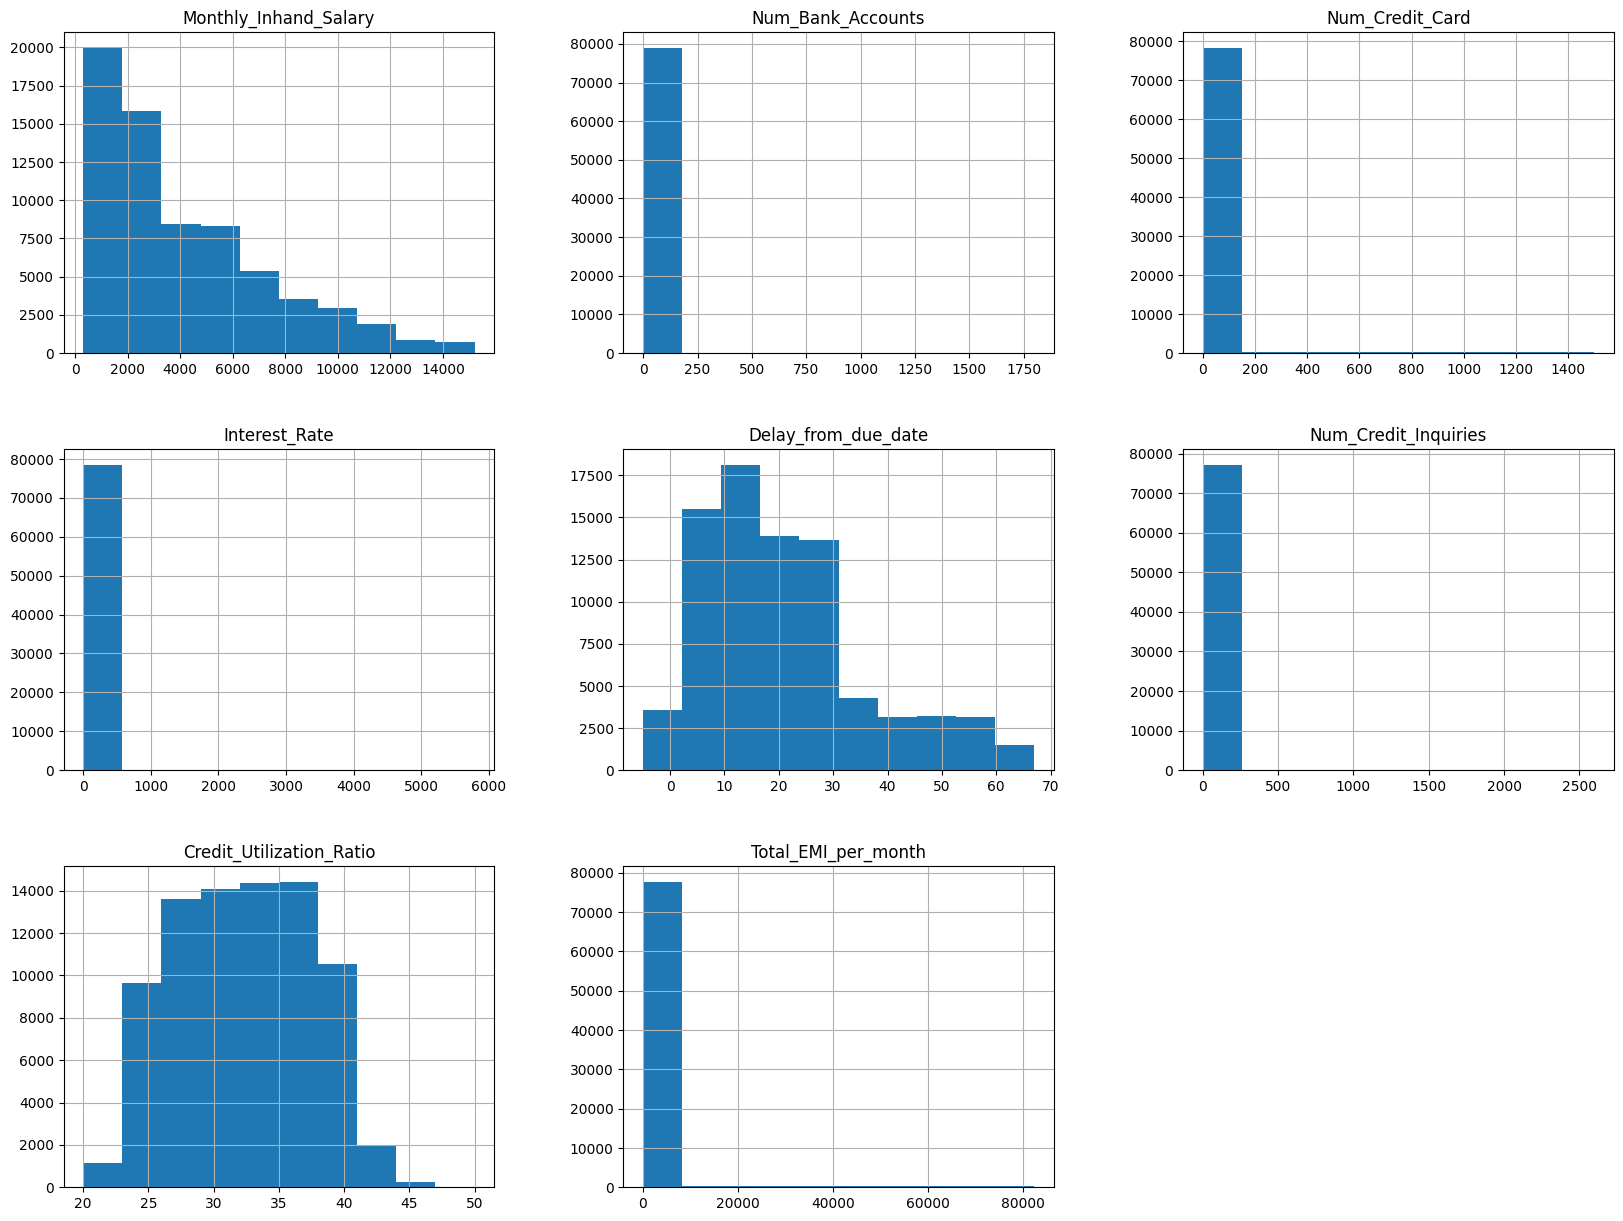

In [ ]:
train.hist(figsize=(20,15))
plt.show()
# Continous and discrete

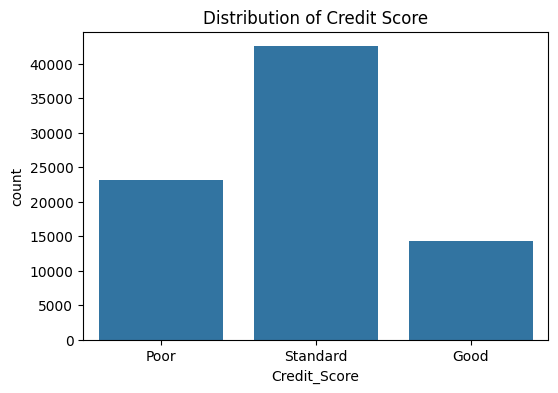

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Credit_Score')
plt.title('Distribution of Credit Score')
plt.show()
# See the distribution of our target

In [ ]:
train.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
15825,0x72bb,CUS_0x966e,February,Paul Carrele,41,165-41-7730,Doctor,69895.76,5954.646667,7,...,Standard,2286.15,39.847002,14 Years and 9 Months,Yes,139.744003,74.79078374047319,High_spent_Medium_value_payments,630.9298796454198,Poor
77273,0x1dac7,CUS_0x9216,February,Aubin Davidw,3048,764-56-9857,Developer,14304.01,1394.000833,4,...,Good,736.76,37.803358,33 Years and 0 Months,No,14.972562,38.90555169250854,High_spent_Medium_value_payments,335.5219699699012,Good
99191,0x25b31,CUS_0x6334,August,Stempelg,1683,756-38-8343,Mechanic,13944362.0,8216.153333,5,...,Standard,698.23,24.567582,14 Years and 11 Months,Yes,302.916240,168.31120411038705,High_spent_Large_value_payments,590.387889,Standard
11280,0x581a,CUS_0xa503,January,Wohli,51,781-28-3569,Accountant,76353.4,6597.783333,0,...,_,752.66,32.784972,30 Years and 4 Months,No,38.459332,439.33476885259074,Low_spent_Medium_value_payments,461.98423287501055,Good
89274,0x22118,CUS_0x50e6,March,NaN,19,487-62-4672,Developer,31819.53,2414.627500,3,...,Good,529.01,29.035487,31 Years and 3 Months,No,0.000000,108.11873520450816,High_spent_Small_value_payments,393.3440147954918,Good


In [ ]:
selected_df.head()

,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
7357,8,21,2,"Auto Loan, and Not Specified",18,18,8.27,13.0
78129,6,23,7,"Mortgage Loan, Mortgage Loan, Student Loan, St...",23,24,5.58,9.0
73154,4,12,2,"Personal Loan, and Home Equity Loan",28,8,12.35,2.0
60516,9,34,8,"Payday Loan, Not Specified, Home Equity Loan, ...",15,15,18.51,11.0
82874,6,11,2,"Personal Loan, and Home Equity Loan",12,17,13.13,0.0


In [ ]:
print(train['Annual_Income'].unique())

['63501.72' '8504.55' '101066.4' ... '16760579.0' '71660.3_' '13944362.0']


In [ ]:
# See the types of our data
print(train.dtypes)
"""
we have to change some columns from object to float64 like
- Age : Illogical values like -500, 2263 and others
- Num_of_Loan : No Missing values and must change type
- Annual_Income
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance
- Total_EMI_per_month
"""

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

'\nwe have to change some columns from object to float64 like\n- Age : Illogical values like -500, 2263 and others\n- Num_of_Loan : No Missing values and must change type\n- Annual_Income\n- Num_of_Delayed_Payment\n- Changed_Credit_Limit\n- Outstanding_Debt\n- Credit_History_Age\n- Amount_invested_monthly\n- Monthly_Balance\n- Total_EMI_per_month\n'

In [ ]:
"""
columns_to_convert = ['Num_of_Loan' : Done
, 'Annual_Income' : Done
, 'Num_of_Delayed_Payment' : Done
,'Changed_Credit_Limit' : Done
,'Outstanding_Debt' : Done
,'Total_EMI_per_month' : Done
,'Monthly_Balance']

"""

"\ncolumns_to_convert = ['Num_of_Loan' : Done\n, 'Annual_Income' : Done\n, 'Num_of_Delayed_Payment' : Done\n,'Changed_Credit_Limit' : Done\n,'Outstanding_Debt' : Done\n,'Total_EMI_per_month' : Done\n,'Monthly_Balance']\n\n"

In [ ]:
columns_to_convert = ['Num_of_Loan']

In [ ]:
problematic_values = train.loc[~train['Num_of_Loan'].str.isnumeric(), 'Num_of_Loan']
print(problematic_values)

54501    -100
11857    -100
41303    -100
61099      6_
14703      2_
         ... 
10759    -100
11830    -100
66452      0_
25571      2_
64329    -100
Name: Num_of_Loan, Length: 6969, dtype: object


In [ ]:
train['Num_of_Loan'] = train['Num_of_Loan'].str.replace('_', '')

In [ ]:
problematic_values = train.loc[~train['Num_of_Loan'].str.isnumeric(), 'Num_of_Loan']
print(problematic_values)

54501    -100
11857    -100
41303    -100
7369     -100
25279    -100
         ... 
84439    -100
38640    -100
10759    -100
11830    -100
64329    -100
Name: Num_of_Loan, Length: 3124, dtype: object


In [ ]:
columns_to_convert = ['Num_of_Loan']

In [ ]:
train[columns_to_convert] = train[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Num_of_Loan is Done

In [ ]:
# Work on Annual Income
problematic_values = train.loc[~train['Annual_Income'].str.isnumeric(), 'Annual_Income']
print(problematic_values)

7357       63501.72
78129       8504.55
73154      101066.4
60516      37353.58
82874      26053.36
            ...    
15825      69895.76
77273      14304.01
99191    13944362.0
11280       76353.4
89274      31819.53
Name: Annual_Income, Length: 80000, dtype: object


In [ ]:
train['Annual_Income'] = train['Annual_Income'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Annual_Income']
train[columns_to_convert] = train[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Annual_Income is Done

In [ ]:
# work on Num_of_Delayed_Payment column
problematic_values = train.loc[~train['Num_of_Delayed_Payment'].astype(str).str.isnumeric(), 'Num_of_Delayed_Payment'] # This columns has 7002 missing values
print(problematic_values)

99589     1_
14703    NaN
69443     8_
30878    12_
12989    NaN
        ... 
73913    NaN
24618    NaN
44890    13_
96077    NaN
15825    NaN
Name: Num_of_Delayed_Payment, Length: 8305, dtype: object


In [ ]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Num_of_Delayed_Payment']
train[columns_to_convert] = train[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Num_of_Delayed_Payment column is Done

In [ ]:
# Work on Changed_Credit_Limit column
problematic_values = train.loc[~train['Changed_Credit_Limit'].astype(str).str.isnumeric(), 'Changed_Credit_Limit']
print(problematic_values)

7357      8.27
78129     5.58
73154    12.35
60516    18.51
82874    13.13
         ...  
15825    11.82
77273    11.95
99191    17.25
11280    14.97
89274     7.67
Name: Changed_Credit_Limit, Length: 80000, dtype: object


In [ ]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Changed_Credit_Limit']
train[columns_to_convert] = train[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Changed_Credit_Limit is Done

In [ ]:
# Work on Outstanding_Debt Column
problematic_values = train.loc[~train['Outstanding_Debt'].astype(str).str.isnumeric(), 'Outstanding_Debt']
print(problematic_values)

7357     2056.37
78129    2870.02
73154    1461.27
60516    3459.09
82874    1339.71
          ...   
15825    2286.15
77273     736.76
99191     698.23
11280     752.66
89274     529.01
Name: Outstanding_Debt, Length: 80000, dtype: object


In [ ]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Outstanding_Debt']
train[columns_to_convert] = train[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Outstanding_Debt is Done

In [ ]:
# Work on Monthly_Balance Column
#problematic_values = train.loc[~train['Monthly_Balance'].astype(str).str.isnumeric(), 'Monthly_Balance']
#print(problematic_values)

In [ ]:
#train['Monthly_Balance'] = train['Monthly_Balance'].str.replace('_', '')

In [ ]:
#train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce') # There is a number here out of range of Float64
# Monthly_Balance is Done

In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7357,0x411b,CUS_0x18b5,June,Caroline Valetkevitcht,45,732-18-5419,Developer,63501.72,5471.810000,9,...,Bad,2056.370117,38.423006,10 Years and 1 Months,Yes,105.238687,83.1981525572061,High_spent_Medium_value_payments,608.7441600134363,Poor
78129,0x1dfcb,CUS_0x4577,February,NaN,-500,709-02-4843,Writer,8504.55,934.712500,8,...,Bad,2870.020020,38.084131,1 Years and 9 Months,NM,26.610877,42.38146500785723,Low_spent_Small_value_payments,314.47890822139806,Standard
73154,0x1c2a4,CUS_0xa137,March,Bartza,27,012-08-7560,Engineer,101066.40,8547.200000,4,...,Standard,1461.270020,41.361711,27 Years and 5 Months,Yes,95.706765,__10000__,High_spent_Small_value_payments,684.1039778575617,Standard
60516,0x17896,CUS_0x836e,May,Nicola Leskey,18,970-91-7807,Musician,37353.58,2926.798333,1583,...,_,3459.090088,31.541090,3 Years and 8 Months,Yes,172.344939,124.14055188853277,!@9#%8,276.19434238588286,Standard
82874,0x1fb98,CUS_0x2ac8,March,NaN,31,489-33-3435,Engineer,26053.36,2059.113333,8,...,Standard,1339.709961,29.099879,23 Years and 9 Months,Yes,39.729983,184.75117018821445,Low_spent_Small_value_payments,271.4301802172912,Standard


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 7357 to 89274
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      72046 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  float64
 8   Monthly_Inhand_Salary     68020 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  float32
 13  Type_of_Loan              70874 non-null  object 
 14  Del

In [ ]:
print(train['Credit_History_Age'].unique())

['10 Years and 1 Months' '1 Years and 9 Months' '27 Years and 5 Months'
 '3 Years and 8 Months' '23 Years and 9 Months' '28 Years and 0 Months'
 '19 Years and 2 Months' '26 Years and 10 Months' '23 Years and 2 Months'
 '9 Years and 10 Months' '19 Years and 10 Months' '13 Years and 4 Months'
 '6 Years and 11 Months' '27 Years and 1 Months' '31 Years and 0 Months'
 '23 Years and 7 Months' '15 Years and 7 Months' '32 Years and 4 Months'
 '4 Years and 3 Months' nan '31 Years and 7 Months'
 '18 Years and 10 Months' '18 Years and 3 Months' '27 Years and 2 Months'
 '21 Years and 6 Months' '15 Years and 1 Months' '15 Years and 9 Months'
 '11 Years and 8 Months' '7 Years and 10 Months' '18 Years and 5 Months'
 '31 Years and 5 Months' '24 Years and 1 Months' '28 Years and 7 Months'
 '30 Years and 5 Months' '26 Years and 6 Months' '8 Years and 7 Months'
 '17 Years and 6 Months' '9 Years and 2 Months' '23 Years and 3 Months'
 '26 Years and 4 Months' '16 Years and 1 Months' '8 Years and 4 Months'
 

In [ ]:
# Work on Credit_History_Age column
years  = []
months = []
for value in train["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
train['Credit_Age_years'] = pd.Series(years)
train['Credit_Age_months'] = pd.Series(months)
train.drop('Credit_History_Age',axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 7357 to 89274
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      72046 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  float64
 8   Monthly_Inhand_Salary     68020 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  float32
 13  Type_of_Loan              70874 non-null  object 
 14  Del

In [ ]:
# Missing values
print(train.isnull().sum())
"""
There is a missing values like
- Name
- Monthly_Inhand_Salary
- Type_of_Loan
- Num_of_Delayed_Payment
- Num_Credit_Inquiries
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance
"""

ID                              0
Customer_ID                     0
Month                           0
Name                         7954
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11980
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9126
Delay_from_due_date             0
Num_of_Delayed_Payment       5583
Changed_Credit_Limit         1666
Num_Credit_Inquiries         1569
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3589
Payment_Behaviour               0
Monthly_Balance               950
Credit_Score                    0
Credit_Age_years            21757
Credit_Age_months           21757
dtype: int64


'\nThere is a missing values like\n- Name\n- Monthly_Inhand_Salary\n- Type_of_Loan\n- Num_of_Delayed_Payment\n- Num_Credit_Inquiries\n- Credit_History_Age\n- Amount_invested_monthly\n- Monthly_Balance\n'

In [ ]:
train.describe(include='object').T

,count,unique,top,freq
ID,80000,80000,0x411b,1
Customer_ID,80000,12500,CUS_0x1410,8
Month,80000,8,July,10052
Name,72046,10138,Nicko,35
Age,80000,1498,28,2281
SSN,80000,12500,#F%$D@*&8,4496
Occupation,80000,16,_______,5651
Type_of_Loan,70874,6260,Not Specified,1118
Credit_Mix,80000,4,Standard,29174
Payment_of_Min_Amount,80000,3,Yes,41859


In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
7357,0x411b,CUS_0x18b5,June,Caroline Valetkevitcht,45,732-18-5419,Developer,63501.72,5471.810000,9,...,2056.370117,38.423006,Yes,105.238687,83.1981525572061,High_spent_Medium_value_payments,608.7441600134363,Poor,24.0,6.0
78129,0x1dfcb,CUS_0x4577,February,NaN,-500,709-02-4843,Writer,8504.55,934.712500,8,...,2870.020020,38.084131,NM,26.610877,42.38146500785723,Low_spent_Small_value_payments,314.47890822139806,Standard,25.0,7.0
73154,0x1c2a4,CUS_0xa137,March,Bartza,27,012-08-7560,Engineer,101066.40,8547.200000,4,...,1461.270020,41.361711,Yes,95.706765,__10000__,High_spent_Small_value_payments,684.1039778575617,Standard,31.0,5.0
60516,0x17896,CUS_0x836e,May,Nicola Leskey,18,970-91-7807,Musician,37353.58,2926.798333,1583,...,3459.090088,31.541090,Yes,172.344939,124.14055188853277,!@9#%8,276.19434238588286,Standard,16.0,0.0
82874,0x1fb98,CUS_0x2ac8,March,NaN,31,489-33-3435,Engineer,26053.36,2059.113333,8,...,1339.709961,29.099879,Yes,39.729983,184.75117018821445,Low_spent_Small_value_payments,271.4301802172912,Standard,NaN,NaN


In [ ]:
train=train.drop(columns=["ID","Name","SSN"],axis=1)

In [ ]:
train['Credit_Mix']=train['Credit_Mix'].replace('_',np.nan)

In [ ]:
train.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11980
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9126
Delay_from_due_date             0
Num_of_Delayed_Payment       5583
Changed_Credit_Limit         1666
Num_Credit_Inquiries         1569
Credit_Mix                  16214
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3589
Payment_Behaviour               0
Monthly_Balance               950
Credit_Score                    0
Credit_Age_years            21757
Credit_Age_months           21757
dtype: int64

In [ ]:
train['Changed_Credit_Limit']=train['Changed_Credit_Limit'].round(3)

In [ ]:
#train['Monthly_Balance']=train['Monthly_Balance'].replace('-333333333333333333333333333',np.nan)

In [ ]:
#train["Monthly_Balance"].value_counts()

In [ ]:
#train['Monthly_Balance']=train['Monthly_Balance'].fillna(train["Monthly_Balance"].mean())
#train['Monthly_Balance']=train['Monthly_Balance'].round(3)

In [ ]:
train["Payment_Behaviour"]=train["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [ ]:
train["Payment_Behaviour"]=train["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
train["Payment_Behaviour"]=train["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
train["Payment_Behaviour"]=train["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
train["Payment_Behaviour"]=train["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
train["Payment_Behaviour"]=train["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
train["Payment_Behaviour"]=train["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)

In [ ]:
train["Payment_Behaviour"].ffill(inplace=True)

In [ ]:
train["Age"].value_counts()

28      2281
38      2269
26      2233
31      2218
36      2197
        ... 
6379       1
1953       1
2441       1
5413       1
3048       1
Name: Age, Length: 1498, dtype: int64

In [ ]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [ ]:
train["Age"] = train["Age"].apply(filter_col)
train["Age"] = train["Age"].astype(int)

In [ ]:
train["Age"][1]

23

In [ ]:
# for i in range(len(train["Age"])):
#     if train["Age"][i] > 90 or train["Age"][i] < 10:
#         train["Age"][i] = np.nan
#     else:
#         train["Age"][i] = train["Age"][i]

In [ ]:
mask = (train["Age"] > 90) | (train["Age"] < 10)
train.loc[mask, "Age"] = np.nan

In [ ]:
train[train["Num_of_Loan"]>100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
35029,CUS_0x7a8d,June,46.0,Architect,1.302322e+05,10750.687500,938,3,7,1030.0,...,1077.660034,26.787144,No,60.039727,972.3030050267323,2.0,322.7260176545383,Standard,18.0,5.0
10906,CUS_0x437e,March,44.0,Architect,2.884047e+04,2466.372500,7,7,15,1035.0,...,196.820007,25.686061,Yes,0.000000,160.4764514872239,3.0,356.160798512776,Standard,16.0,2.0
68540,CUS_0x578b,May,32.0,Journalist,8.002575e+03,644.881250,6,9,29,926.0,...,1699.989990,38.029378,Yes,8.056869,39.60028576887449,2.0,286.83097004362287,Standard,NaN,NaN
36094,CUS_0x8207,July,27.0,_______,3.467786e+04,2725.821667,6,5,16,1236.0,...,2345.020020,26.886408,Yes,182.585183,NaN,5.0,289.60976190910867,Poor,16.0,7.0
20656,CUS_0x8c44,January,32.0,Writer,1.410008e+05,11973.070000,5,3,20,1185.0,...,290.500000,36.911306,Yes,255.398709,231.97271346368424,5.0,959.935577608607,Standard,16.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90973,CUS_0x59d8,June,23.0,Musician,1.681187e+07,2933.588333,10,9,26,1345.0,...,3783.590088,31.538713,Yes,153.990170,40.78169994823565,6.0,348.58696357648176,Poor,NaN,NaN
53031,CUS_0x6aa4,August,18.0,Architect,4.973235e+04,NaN,6,10,18,1085.0,...,4295.319824,33.627464,Yes,211.312341,397.91905776958674,2.0,92.90485090525308,Poor,6.0,3.0
84090,CUS_0x4d01,March,44.0,Engineer,1.045558e+04,727.298750,10,9,30,147.0,...,1827.349976,35.107587,Yes,20.147813,52.71432928663202,1.0,289.867732256563,Poor,NaN,NaN
55183,CUS_0x33d6,August,18.0,Developer,1.759948e+04,1202.623333,2,6,6,1412.0,...,1426.150024,36.281671,No,13.080691,77.0585657554726,6.0,290.12307669803397,Good,17.0,4.0


In [ ]:
mask = (train["Num_of_Loan"] > 100)
train.loc[mask, "Num_of_Loan"] = np.nan

In [ ]:
train["Occupation"]=train["Occupation"].replace("_______",np.nan)

In [ ]:
train["Occupation"]=train["Occupation"].astype("object")

In [ ]:
train_month={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8}
train["Month"]=train["Month"].replace(train_month)

In [ ]:
train[train["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].value_counts()

-1    19
Name: Num_Bank_Accounts, dtype: int64

In [ ]:
train["Num_Bank_Accounts"]=train["Num_Bank_Accounts"].replace(-1,0)

In [ ]:
train[train["Num_Bank_Accounts"]> 300]["Num_Bank_Accounts"].value_counts()

803     7
1139    4
857     4
1096    4
1481    3
       ..
1394    1
1388    1
1458    1
1365    1
992     1
Name: Num_Bank_Accounts, Length: 677, dtype: int64

In [ ]:
mask = (train["Num_Bank_Accounts"] > 300)
train.loc[mask, "Num_Bank_Accounts"] = np.nan

In [ ]:
train["Num_Credit_Card"].value_counts()

5      14831
7      13264
6      13130
4      11258
3      10623
       ...  
418        1
588        1
498        1
847        1
90         1
Name: Num_Credit_Card, Length: 1081, dtype: int64

In [ ]:
train[train["Num_Credit_Card"]<0]["Num_Credit_Card"].sum()

0

In [ ]:
train["Interest_Rate"].value_counts()

5       3961
8       3951
6       3795
10      3628
12      3618
        ... 
4753       1
59         1
5789       1
5424       1
4712       1
Name: Interest_Rate, Length: 1424, dtype: int64

In [ ]:
train['Changed_Credit_Limit']=train['Changed_Credit_Limit'].replace('_',np.nan)

In [ ]:
train['Changed_Credit_Limit']=train['Changed_Credit_Limit'].fillna(train["Changed_Credit_Limit"].mean())

In [ ]:
train['Changed_Credit_Limit']=train['Changed_Credit_Limit'].round(3)

In [ ]:
train["Type_of_Loan"] = train["Type_of_Loan"].fillna(train["Type_of_Loan"].ffill())

In [ ]:
train.isnull().sum()

Customer_ID                     0
Month                           0
Age                          2266
Occupation                   5651
Annual_Income                   0
Monthly_Inhand_Salary       11980
Num_Bank_Accounts             893
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                   361
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       5583
Changed_Credit_Limit            0
Num_Credit_Inquiries         1569
Credit_Mix                  16214
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3589
Payment_Behaviour               0
Monthly_Balance               950
Credit_Score                    0
Credit_Age_years            21757
Credit_Age_months           21757
dtype: int64

In [ ]:
train["Delay_from_due_date"].value_counts()

 15    2970
 13    2723
 8     2692
 14    2686
 10    2635
       ... 
 64      49
 65      46
 66      28
-5       24
 67      19
Name: Delay_from_due_date, Length: 73, dtype: int64

In [ ]:
(train["Delay_from_due_date"]<0).sum()

473

In [ ]:
mask = (train["Delay_from_due_date"] <0)
train.loc[mask, "Delay_from_due_date"] = 0

In [ ]:
train["Num_Credit_Inquiries"].value_counts()

4.0       8997
3.0       7057
6.0       6510
2.0       6466
7.0       6409
          ... 
328.0        1
597.0        1
1355.0       1
1562.0       1
2212.0       1
Name: Num_Credit_Inquiries, Length: 1053, dtype: int64

In [ ]:
(train["Num_Credit_Inquiries"]<0).sum()

0

In [ ]:
train["Credit_Utilization_Ratio"].value_counts()

38.423006    1
34.849050    1
35.537549    1
36.685991    1
30.565073    1
            ..
23.239566    1
25.382485    1
36.760781    1
35.855951    1
29.035487    1
Name: Credit_Utilization_Ratio, Length: 80000, dtype: int64

In [ ]:
train["Credit_Utilization_Ratio"]=train["Credit_Utilization_Ratio"].round(3)

In [ ]:
train["Total_EMI_per_month"].value_counts()

0.000000        8479
40.293529          8
112.966699         8
289.029155         8
97.887898          8
                ... 
169.362434         1
57432.000000       1
58723.000000       1
38084.000000       1
38.459332          1
Name: Total_EMI_per_month, Length: 14296, dtype: int64

In [ ]:
train["Total_EMI_per_month"]=train["Total_EMI_per_month"].round(3)

In [ ]:
train["Amount_invested_monthly"].value_counts()

__10000__             3451
0.0                    140
83.1981525572061         1
149.26780615872963       1
103.4131889060336        1
                      ... 
129.80089632111506       1
141.8788887514089        1
584.786702935284         1
120.12547712726689       1
108.11873520450816       1
Name: Amount_invested_monthly, Length: 72822, dtype: int64

In [ ]:
train["Amount_invested_monthly"]=train["Amount_invested_monthly"].replace("__10000__",np.nan)
train["Amount_invested_monthly"]=train["Amount_invested_monthly"].astype("float")
train["Amount_invested_monthly"]=train["Amount_invested_monthly"].round(3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 7357 to 89274
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Month                     80000 non-null  int64  
 2   Age                       77734 non-null  float64
 3   Occupation                74349 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     68020 non-null  float64
 6   Num_Bank_Accounts         79107 non-null  float64
 7   Num_Credit_Card           80000 non-null  int64  
 8   Interest_Rate             80000 non-null  int64  
 9   Num_of_Loan               79639 non-null  float32
 10  Type_of_Loan              80000 non-null  object 
 11  Delay_from_due_date       80000 non-null  int64  
 12  Num_of_Delayed_Payment    74417 non-null  float32
 13  Changed_Credit_Limit      80000 non-null  float32
 14  Num

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

<Axes: >

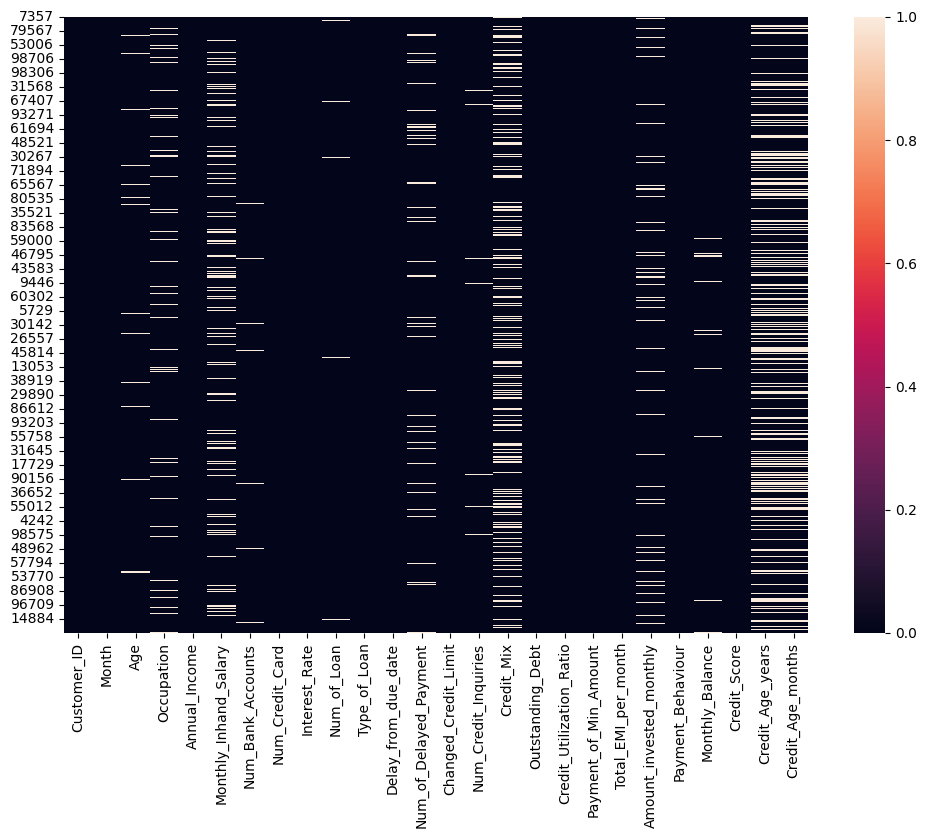

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull())

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [ ]:
X_train = train.drop('Credit_Score',axis = 1)
y_train = train['Credit_Score']

In [ ]:
"""
numerical_data = X_train.select_dtypes(include='number')
object_data = X_train.select_dtypes(include='object')
print(numerical_data.head(3))
"""
# print(object_data.head(3))

"\nnumerical_data = X_train.select_dtypes(include='number')\nobject_data = X_train.select_dtypes(include='object')\nprint(numerical_data.head(3))\n"

In [ ]:
numerical_data = []
object_data = []

for column in X_train.columns:
    if X_train.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
X_train[numerical_data] = imputer.fit_transform(X_train[numerical_data])

In [ ]:
X_train.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                   5651
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  16214
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance               950
Credit_Age_years                0
Credit_Age_months               0
dtype: int64

In [ ]:
# Work on Occupation column
X_train['Occupation'].ffill(inplace=True)

In [ ]:
print(X_train['Occupation'].unique())

['Developer' 'Writer' 'Engineer' 'Musician' 'Architect' 'Scientist'
 'Journalist' 'Doctor' 'Mechanic' 'Lawyer' 'Entrepreneur' 'Manager'
 'Media_Manager' 'Teacher' 'Accountant']


In [ ]:
X_train["Monthly_Inhand_Salary"]=X_train["Monthly_Inhand_Salary"].round(3)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 7357 to 89274
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Month                     80000 non-null  float64
 2   Age                       80000 non-null  float64
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  float64
 8   Interest_Rate             80000 non-null  float64
 9   Num_of_Loan               80000 non-null  float64
 10  Type_of_Loan              80000 non-null  object 
 11  Delay_from_due_date       80000 non-null  float64
 12  Num_of_Delayed_Payment    80000 non-null  float64
 13  Changed_Credit_Limit      80000 non-null  float64
 14  Num

<ipython-input-123-0fdcb48e5b69>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Mix', data=X_train, palette="mako")


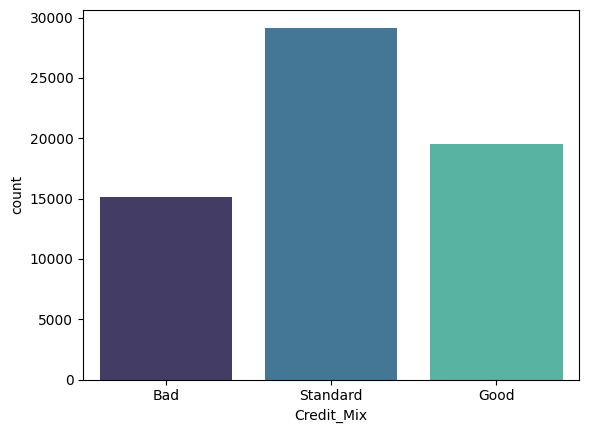

In [ ]:
sns.countplot(x='Credit_Mix', data=X_train, palette="mako")
plt.show()

In [ ]:
# Replace missing values with "Unknown"
X_train['Credit_Mix'].fillna("Unknown", inplace=True)

<ipython-input-125-0fdcb48e5b69>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Mix', data=X_train, palette="mako")


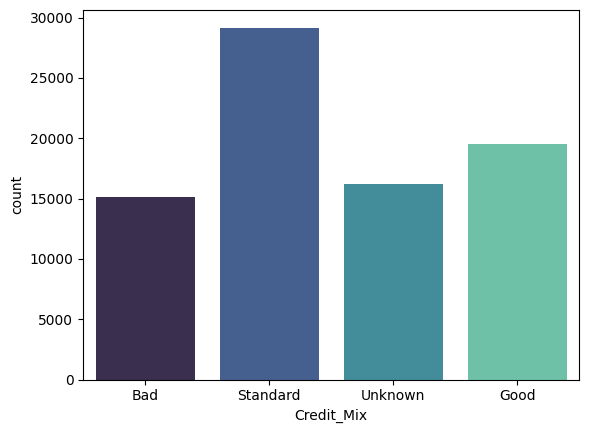

In [ ]:
sns.countplot(x='Credit_Mix', data=X_train, palette="mako")
plt.show()

In [ ]:
# Work on Credit_Mix Column
# Unkown --> 0 , Bad --> 1 , Standard --> 2 , Good --> 3
X_train['Credit_Mix']=X_train['Credit_Mix'].replace("Unknown",0)
X_train['Credit_Mix']=X_train['Credit_Mix'].replace("Bad",1)
X_train['Credit_Mix']=X_train['Credit_Mix'].replace("Standard",2)
X_train['Credit_Mix']=X_train['Credit_Mix'].replace("Good",3)

In [ ]:
print(X_train['Credit_Mix'].unique())

[1 2 0 3]


In [ ]:
y_train.head()

7357         Poor
78129    Standard
73154    Standard
60516    Standard
82874    Standard
Name: Credit_Score, dtype: object

In [ ]:
print(y_train.unique())

['Poor' 'Standard' 'Good']


In [ ]:
# Work on Credit_Score Column
#  Poor --> 1 , Standard --> 2 , Good --> 3
y_train=y_train.replace("Poor",1)
y_train=y_train.replace("Standard",2)
y_train=y_train.replace("Good",3)

In [ ]:
print(y_train.unique())

[1 2 3]


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 7357 to 89274
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Month                     80000 non-null  float64
 2   Age                       80000 non-null  float64
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  float64
 8   Interest_Rate             80000 non-null  float64
 9   Num_of_Loan               80000 non-null  float64
 10  Type_of_Loan              80000 non-null  object 
 11  Delay_from_due_date       80000 non-null  float64
 12  Num_of_Delayed_Payment    80000 non-null  float64
 13  Changed_Credit_Limit      80000 non-null  float64
 14  Num

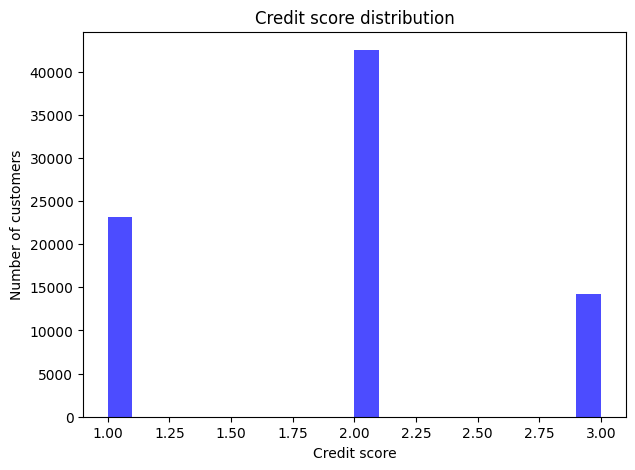

In [ ]:
# Target
plt.figure(figsize=(7, 5))
plt.hist(y_train, bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

<ipython-input-134-cd1a6d0954b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

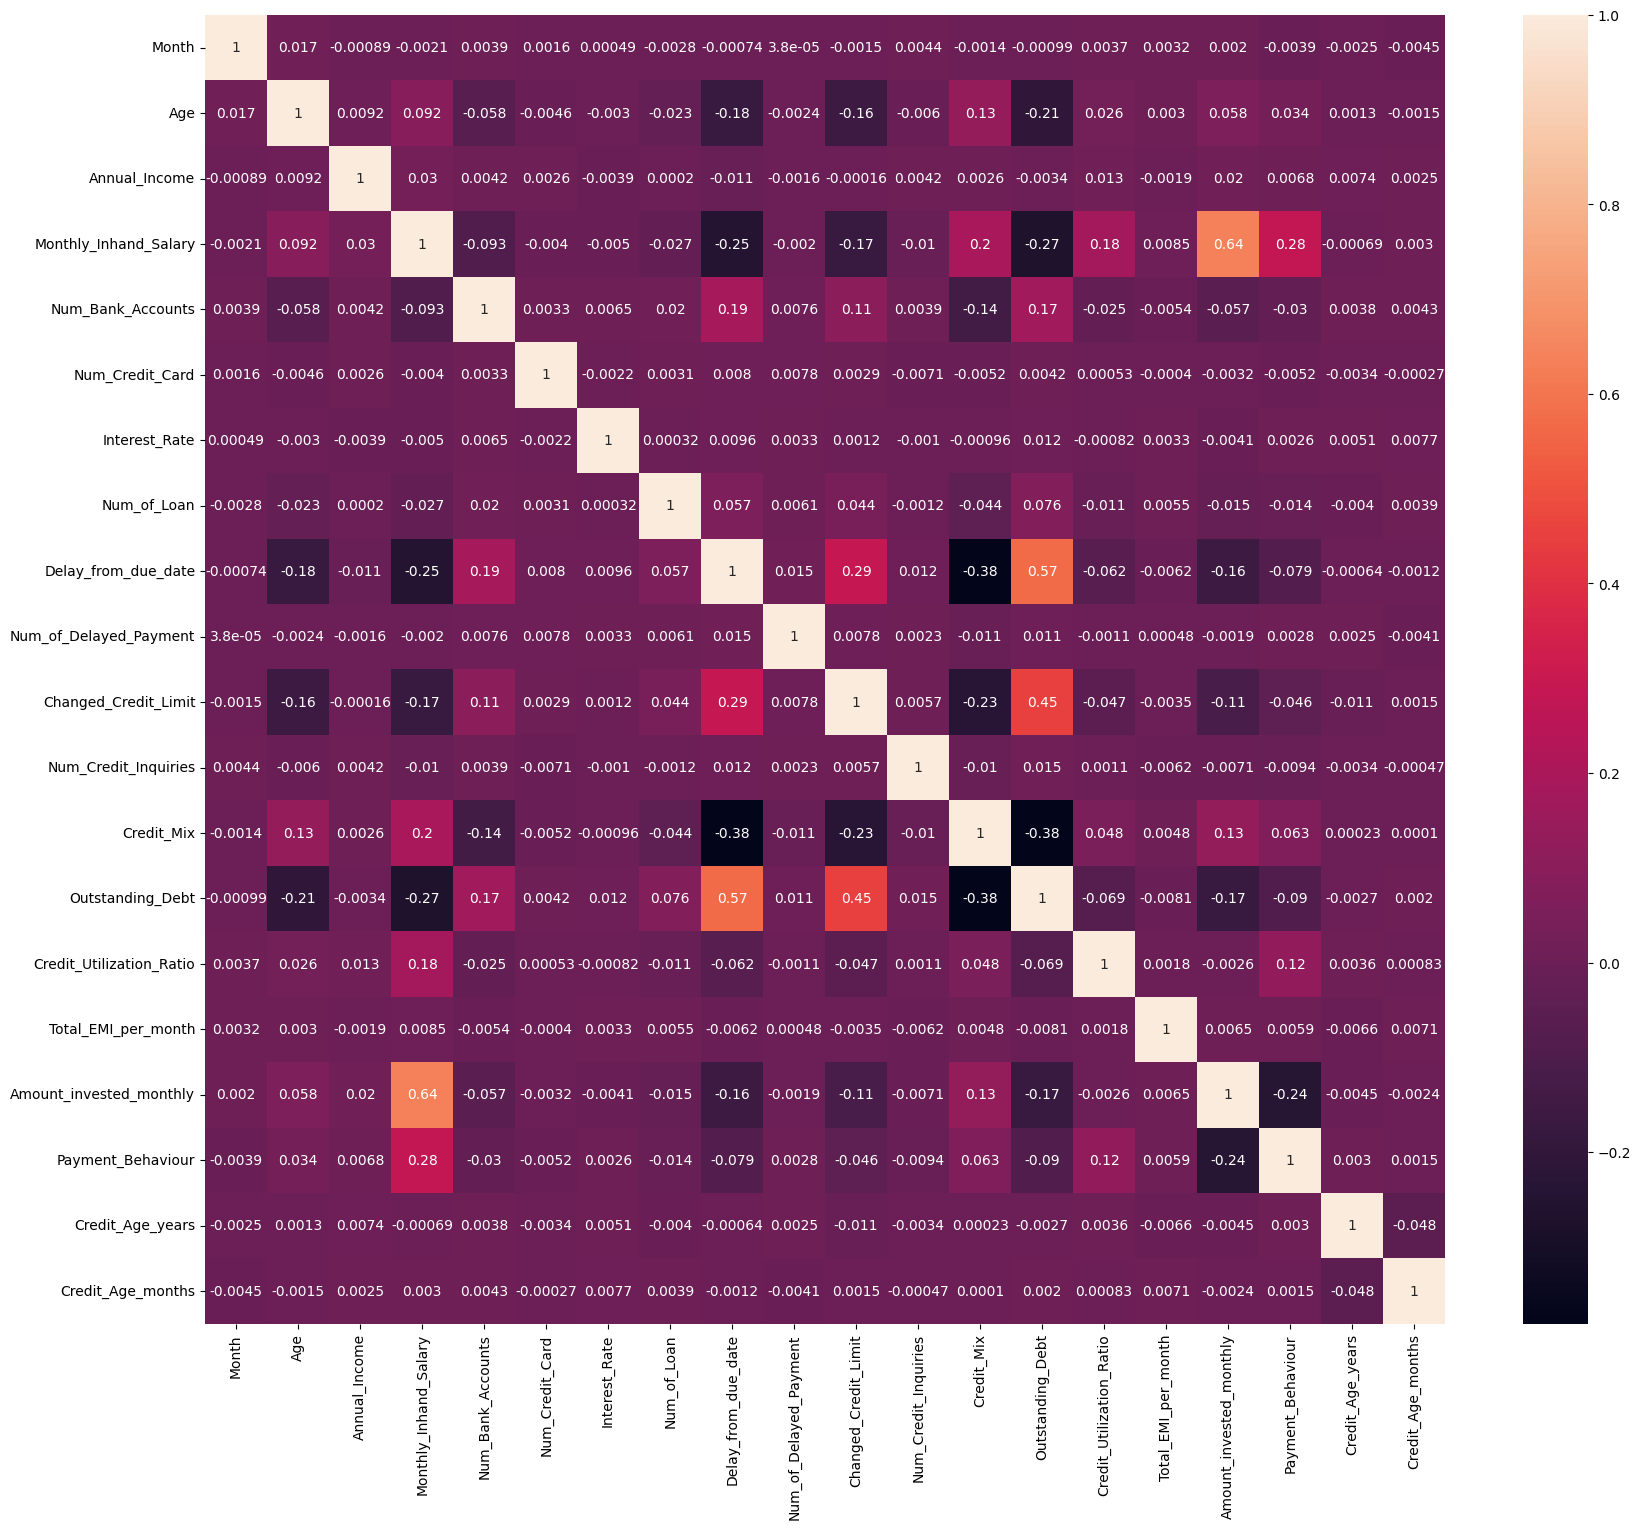

In [ ]:
plt.figure(figsize=(20,17))
sns.heatmap(X_train.corr(),annot=True)
plt.show

In [ ]:
# Show Categorical Data
#train = train.apply(lambda x: x.astype('category').cat.codes)
#train.head(10)

In [ ]:
X_train.head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months
7357,CUS_0x18b5,6.0,45.0,Developer,63501.720,5471.810,9.0,8.0,21.0,2.0,...,1,2056.370117,38.423,Yes,105.239,83.1980,5.0,608.7441600134363,24.0,6.0
78129,CUS_0x4577,2.0,28.4,Writer,8504.550,934.712,8.0,6.0,23.0,7.0,...,1,2870.020020,38.084,NM,26.611,42.3810,1.0,314.47890822139806,25.0,7.0
73154,CUS_0xa137,3.0,27.0,Engineer,101066.400,8547.200,4.0,4.0,12.0,2.0,...,2,1461.270020,41.362,Yes,95.707,280.6110,4.0,684.1039778575617,31.0,5.0
60516,CUS_0x836e,5.0,18.0,Musician,37353.580,2926.798,6.0,9.0,34.0,8.0,...,0,3459.090088,31.541,Yes,172.345,124.1410,4.0,276.19434238588286,16.0,0.0
82874,CUS_0x2ac8,3.0,31.0,Engineer,26053.360,2059.113,8.0,6.0,11.0,2.0,...,2,1339.709961,29.100,Yes,39.730,184.7510,1.0,271.4301802172912,11.8,4.4
1690,CUS_0x5d94,3.0,39.0,Developer,122978.430,10514.202,0.0,1.0,9.0,3.0,...,3,1197.329956,41.749,No,168.007,125.7780,6.0,997.6354590329512,26.0,6.0
35029,CUS_0x7a8d,6.0,46.0,Architect,130232.250,10750.688,2.8,3.0,7.0,1.4,...,0,1077.660034,26.787,No,60.040,972.3030,2.0,322.7260176545383,18.0,5.0
91705,CUS_0x6c5d,2.0,26.0,Scientist,72050.920,6173.243,2.0,5.0,4.0,2.0,...,3,297.940002,34.046,NM,88.941,196.2300,4.0,592.1531621552481,15.4,4.8
54501,CUS_0xa123,6.0,43.0,Scientist,24688.880,2256.407,8.0,483.0,9.0,-100.0,...,2,1014.830017,29.669,NM,10.869,30.9370,5.0,433.83440806569064,1.0,0.0
20160,CUS_0x8bd3,1.0,25.0,Journalist,14982.100,1407.508,7.0,10.0,19.0,6.0,...,1,4224.629883,38.492,Yes,68.488,112.6834,1.0,283.3449103800592,18.6,9.4


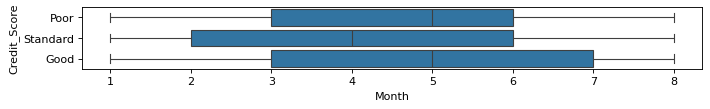

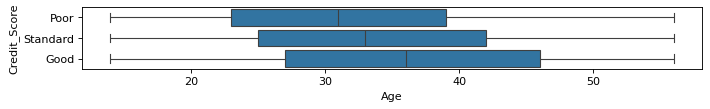

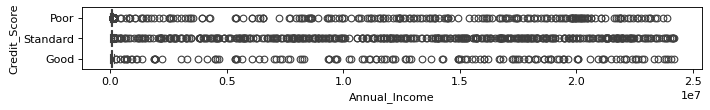

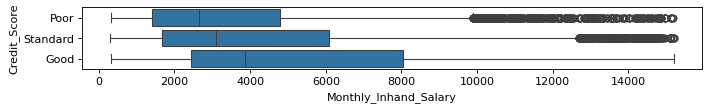

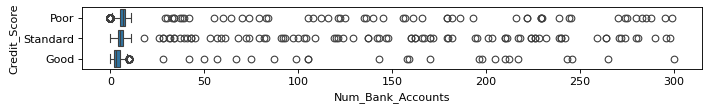

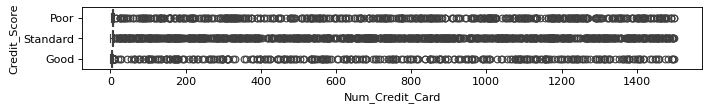

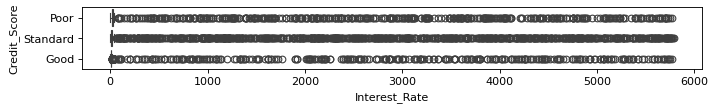

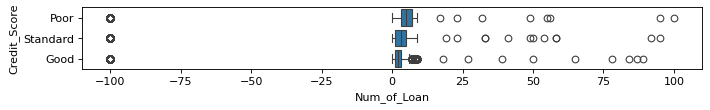

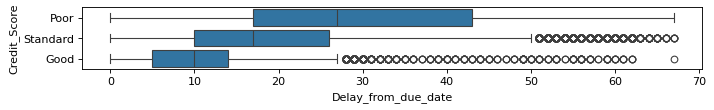

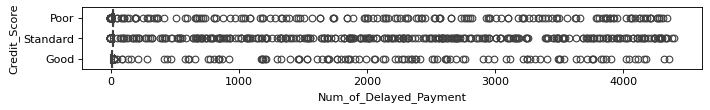

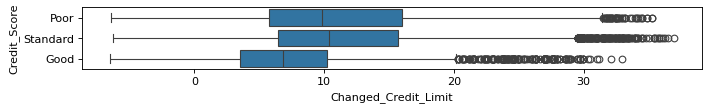

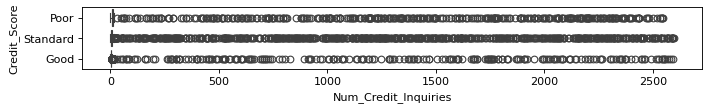

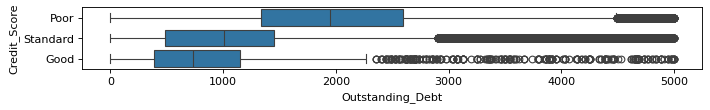

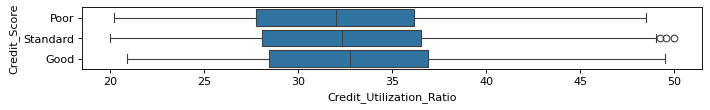

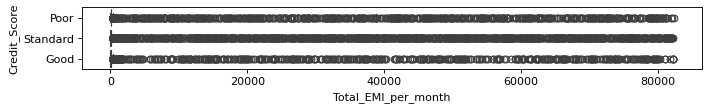

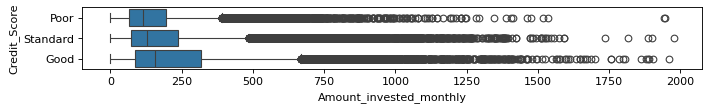

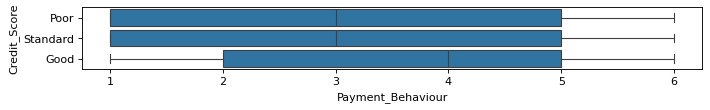

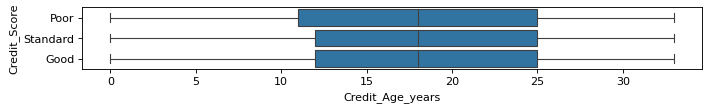

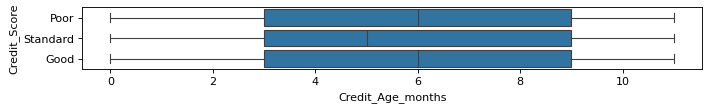

In [ ]:
# Showing the outlires
for i in range(0,len(numerical_data)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = train[numerical_data[i]], y=train['Credit_Score'], data = train,orient="h")
    plt.show()

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,80000.0,4.502862,2.291169e+00,1.000,3.00000,5.000000,7.000000,8.000000e+00
Age,80000.0,33.325977,1.071849e+01,14.000,25.00000,33.000000,42.000000,5.600000e+01
Annual_Income,80000.0,177017.135818,1.437305e+06,7005.930,19454.97250,37475.070000,72608.320000,2.419806e+07
Monthly_Inhand_Salary,80000.0,4194.436232,3.186233e+03,303.645,1628.24300,3089.149000,5941.093000,1.520463e+04
Num_Bank_Accounts,80000.0,5.665233,8.043553e+00,0.000,3.00000,5.000000,7.000000,3.000000e+02
Num_Credit_Card,80000.0,22.599837,1.295922e+02,0.000,4.00000,5.000000,7.000000,1.499000e+03
Interest_Rate,80000.0,71.451800,4.616865e+02,1.000,8.00000,13.000000,20.000000,5.789000e+03
Num_of_Loan,80000.0,-0.512105,2.023777e+01,-100.000,1.00000,3.000000,5.000000,1.000000e+02
Delay_from_due_date,80000.0,21.052263,1.483031e+01,0.000,10.00000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,80000.0,30.519625,2.181118e+02,-3.000,9.00000,14.000000,18.000000,4.397000e+03


In [ ]:
print(X_train['Type_of_Loan'].unique())

['Auto Loan, and Not Specified'
 'Mortgage Loan, Mortgage Loan, Student Loan, Student Loan, Payday Loan, Personal Loan, and Home Equity Loan'
 'Personal Loan, and Home Equity Loan' ...
 'Payday Loan, Mortgage Loan, Auto Loan, and Student Loan'
 'Mortgage Loan, Student Loan, Mortgage Loan, Payday Loan, and Student Loan'
 'Mortgage Loan, Payday Loan, Credit-Builder Loan, Not Specified, Not Specified, Auto Loan, Credit-Builder Loan, and Credit-Builder Loan']


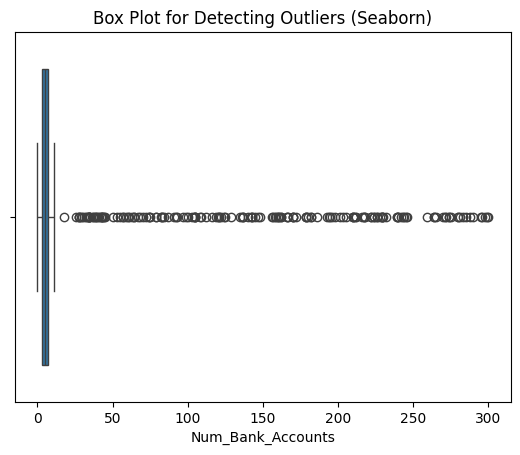

In [ ]:
# Box plot using seaborn
sns.boxplot(x='Num_Bank_Accounts', data=X_train)
plt.title('Box Plot for Detecting Outliers (Seaborn)')
plt.show()

In [ ]:
X_train=X_train.drop(columns=["Type_of_Loan"],axis=1)

In [ ]:
X_train=X_train.drop(columns=["Customer_ID"],axis=1)

In [ ]:
print(X_train['Occupation'].unique())

['Developer' 'Writer' 'Engineer' 'Musician' 'Architect' 'Scientist'
 'Journalist' 'Doctor' 'Mechanic' 'Lawyer' 'Entrepreneur' 'Manager'
 'Media_Manager' 'Teacher' 'Accountant']


<ipython-input-144-268761d925d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=X_train, palette="mako")


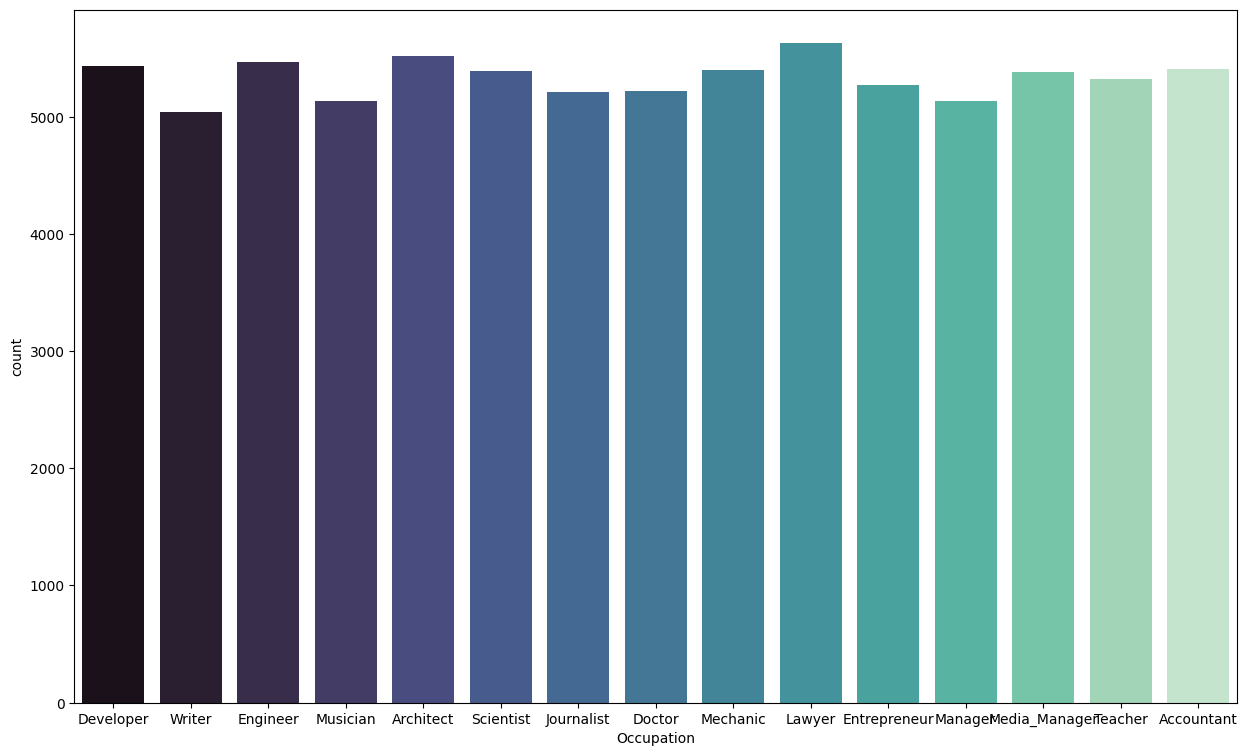

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(x='Occupation', data=X_train, palette="mako")
plt.show()

In [ ]:
X_train['Occupation']=X_train['Occupation'].replace("Scientist",1)
X_train['Occupation']=X_train['Occupation'].replace("Teacher",2)
X_train['Occupation']=X_train['Occupation'].replace("Engineer",3)
X_train['Occupation']=X_train['Occupation'].replace("Entrepreneur",4)
X_train['Occupation']=X_train['Occupation'].replace("Developer",5)
X_train['Occupation']=X_train['Occupation'].replace("Lawyer",6)
X_train['Occupation']=X_train['Occupation'].replace("Media_Manager",7)
X_train['Occupation']=X_train['Occupation'].replace("Doctor",8)
X_train['Occupation']=X_train['Occupation'].replace("Journalist",9)
X_train['Occupation']=X_train['Occupation'].replace("Manager",10)
X_train['Occupation']=X_train['Occupation'].replace("Accountant",11)
X_train['Occupation']=X_train['Occupation'].replace("Musician",12)
X_train['Occupation']=X_train['Occupation'].replace("Mechanic",13)
X_train['Occupation']=X_train['Occupation'].replace("Writer",14)
X_train['Occupation']=X_train['Occupation'].replace("Architect",15)

In [ ]:
print(X_train['Payment_of_Min_Amount'].unique())

['Yes' 'NM' 'No']


<ipython-input-147-91987c91bb74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment_of_Min_Amount', data=X_train, palette="mako")


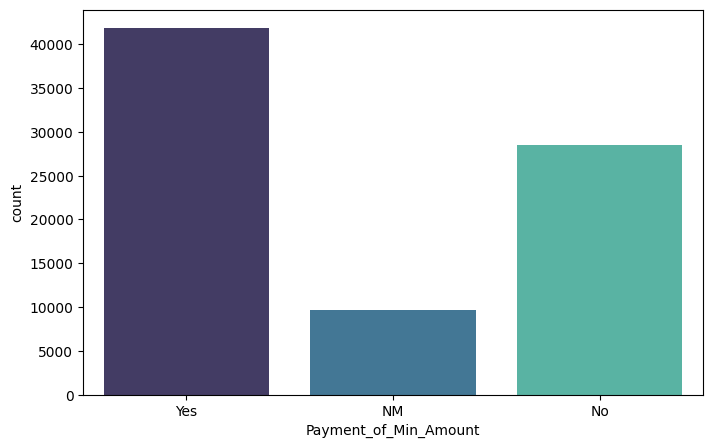

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment_of_Min_Amount', data=X_train, palette="mako")
plt.show()

In [ ]:
X_train['Payment_of_Min_Amount']=X_train['Payment_of_Min_Amount'].replace("No",0)
X_train['Payment_of_Min_Amount']=X_train['Payment_of_Min_Amount'].replace("NM",1)
X_train['Payment_of_Min_Amount']=X_train['Payment_of_Min_Amount'].replace("Yes",2)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 7357 to 89274
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  float64
 1   Age                       80000 non-null  float64
 2   Occupation                80000 non-null  int64  
 3   Annual_Income             80000 non-null  float64
 4   Monthly_Inhand_Salary     80000 non-null  float64
 5   Num_Bank_Accounts         80000 non-null  float64
 6   Num_Credit_Card           80000 non-null  float64
 7   Interest_Rate             80000 non-null  float64
 8   Num_of_Loan               80000 non-null  float64
 9   Delay_from_due_date       80000 non-null  float64
 10  Num_of_Delayed_Payment    80000 non-null  float64
 11  Changed_Credit_Limit      80000 non-null  float64
 12  Num_Credit_Inquiries      80000 non-null  float64
 13  Credit_Mix                80000 non-null  int64  
 14  Out

In [ ]:
print(X_train.describe().T)
"""
1- Num_of_Loan: Negative numbers
2- Num_Bank_Accounts : zero Bank account??
3- Num_Credit_Card : zero credit card??
4- Num_of_Loan : Negative --> 0
5- Num_of_Delayed_Payment : Negative --> 0
6- Changed_Credit_Limit : Negative --> Positive
7- Monthly_Balance : Negative --> postive
"""

                            count           mean           std       min  \
Month                     80000.0       4.502862  2.291169e+00     1.000   
Age                       80000.0      33.325977  1.071849e+01    14.000   
Occupation                80000.0       7.963125  4.326615e+00     1.000   
Annual_Income             80000.0  177017.135818  1.437305e+06  7005.930   
Monthly_Inhand_Salary     80000.0    4194.436232  3.186233e+03   303.645   
Num_Bank_Accounts         80000.0       5.665233  8.043553e+00     0.000   
Num_Credit_Card           80000.0      22.599837  1.295922e+02     0.000   
Interest_Rate             80000.0      71.451800  4.616865e+02     1.000   
Num_of_Loan               80000.0      -0.512105  2.023777e+01  -100.000   
Delay_from_due_date       80000.0      21.052263  1.483031e+01     0.000   
Num_of_Delayed_Payment    80000.0      30.519625  2.181118e+02    -3.000   
Changed_Credit_Limit      80000.0      10.390226  6.723251e+00    -6.490   
Num_Credit_I

'\n1- Num_of_Loan: Negative numbers\n2- Num_Bank_Accounts : zero Bank account??\n3- Num_Credit_Card : zero credit card??\n4- Num_of_Loan : Negative --> 0\n5- Num_of_Delayed_Payment : Negative --> 0\n6- Changed_Credit_Limit : Negative --> Positive\n7- Monthly_Balance : Negative --> postive\n'

In [ ]:
# print(train['Monthly_Balance'].unique())  # -3333333333333333333333333333   --> 333333333333333333333333333333
X_train['Monthly_Balance'].value_counts()

__-333333333333333333333333333__    8
608.7441600134363                   1
306.8039028481745                   1
408.8590167078987                   1
279.3730037740717                   1
                                   ..
423.98643370950117                  1
288.859954121157                    1
579.1122394133148                   1
366.2890379762706                   1
393.3440147954918                   1
Name: Monthly_Balance, Length: 79043, dtype: int64

In [ ]:
X_train['Monthly_Balance']=X_train['Monthly_Balance'].str.strip().replace('__-333333333333333333333333333__',np.nan)
X_train['Monthly_Balance'].value_counts()
X_train['Monthly_Balance']=X_train['Monthly_Balance'].astype("float")
X_train['Monthly_Balance']=X_train['Monthly_Balance'].fillna(X_train['Monthly_Balance'].median())
X_train['Monthly_Balance']=X_train['Monthly_Balance'].round(3)

In [ ]:
X_train['Monthly_Balance'].value_counts()

336.712    2269
298.962       5
327.078       4
248.532       4
275.426       4
           ... 
864.177       1
602.907       1
328.763       1
401.134       1
393.344       1
Name: Monthly_Balance, Length: 71883, dtype: int64

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,80000.0,4.502862,2.291169e+00,1.000,3.00000,5.000000,7.000000,8.000000e+00
Age,80000.0,33.325977,1.071849e+01,14.000,25.00000,33.000000,42.000000,5.600000e+01
Occupation,80000.0,7.963125,4.326615e+00,1.000,4.00000,8.000000,12.000000,1.500000e+01
Annual_Income,80000.0,177017.135818,1.437305e+06,7005.930,19454.97250,37475.070000,72608.320000,2.419806e+07
Monthly_Inhand_Salary,80000.0,4194.436232,3.186233e+03,303.645,1628.24300,3089.149000,5941.093000,1.520463e+04
Num_Bank_Accounts,80000.0,5.665233,8.043553e+00,0.000,3.00000,5.000000,7.000000,3.000000e+02
Num_Credit_Card,80000.0,22.599837,1.295922e+02,0.000,4.00000,5.000000,7.000000,1.499000e+03
Interest_Rate,80000.0,71.451800,4.616865e+02,1.000,8.00000,13.000000,20.000000,5.789000e+03
Num_of_Loan,80000.0,-0.512105,2.023777e+01,-100.000,1.00000,3.000000,5.000000,1.000000e+02
Delay_from_due_date,80000.0,21.052263,1.483031e+01,0.000,10.00000,18.000000,28.000000,6.700000e+01


In [ ]:
"""
1- Num_of_Loan: Negative --> Positive .............. Done
2- Num_Bank_Accounts : zero Bank account?? 0 --> 1 ................. Done
3- Num_Credit_Card : zero credit card?? 0 --> 1 ................. Done
4-
5- Num_of_Delayed_Payment : Negative --> 0
6- Changed_Credit_Limit : Negative --> Positive ................. Done
7- Monthly_Balance : Negative --> postive .................. Done
"""

'\n1- Num_of_Loan: Negative --> Positive .............. Done\n2- Num_Bank_Accounts : zero Bank account?? 0 --> 1 ................. Done\n3- Num_Credit_Card : zero credit card?? 0 --> 1 ................. Done\n4-\n5- Num_of_Delayed_Payment : Negative --> 0\n6- Changed_Credit_Limit : Negative --> Positive ................. Done\n7- Monthly_Balance : Negative --> postive .................. Done\n'

In [ ]:
X_train['Num_of_Loan'] = X_train['Num_of_Loan'].abs()

In [ ]:
X_train['Changed_Credit_Limit'] = X_train['Changed_Credit_Limit'].abs()

In [ ]:
mask = (X_train["Num_Bank_Accounts"] <1)
X_train.loc[mask, "Num_Bank_Accounts"] = np.nan

In [ ]:
train.isnull().sum()

Customer_ID                     0
Month                           0
Age                          2266
Occupation                   5651
Annual_Income                   0
Monthly_Inhand_Salary       11980
Num_Bank_Accounts             893
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                   361
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       5583
Changed_Credit_Limit            0
Num_Credit_Inquiries         1569
Credit_Mix                  16214
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      7040
Payment_Behaviour               0
Monthly_Balance               950
Credit_Score                    0
Credit_Age_years            21757
Credit_Age_months           21757
dtype: int64

In [ ]:
X_train['Num_Bank_Accounts'].fillna(1, inplace=True)

In [ ]:
mask = (X_train["Num_Credit_Card"] <1)
X_train.loc[mask, "Age"] = 1

In [ ]:
mask = (X_train["Num_of_Loan"] <0)
X_train.loc[mask, "Num_of_Loan"] = 0

In [ ]:
mask = (X_train["Num_of_Delayed_Payment"] <0)
X_train.loc[mask, "Num_of_Delayed_Payment"] = 0

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,80000.0,4.502862,2.291169e+00,1.000,3.00000,5.000000,7.000000,8.000000e+00
Age,80000.0,33.322077,1.072402e+01,1.000,25.00000,33.000000,42.000000,5.600000e+01
Occupation,80000.0,7.963125,4.326615e+00,1.000,4.00000,8.000000,12.000000,1.500000e+01
Annual_Income,80000.0,177017.135818,1.437305e+06,7005.930,19454.97250,37475.070000,72608.320000,2.419806e+07
Monthly_Inhand_Salary,80000.0,4194.436232,3.186233e+03,303.645,1628.24300,3089.149000,5941.093000,1.520463e+04
Num_Bank_Accounts,80000.0,5.709080,8.015228e+00,1.000,3.00000,5.000000,7.000000,3.000000e+02
Num_Credit_Card,80000.0,22.599837,1.295922e+02,0.000,4.00000,5.000000,7.000000,1.499000e+03
Interest_Rate,80000.0,71.451800,4.616865e+02,1.000,8.00000,13.000000,20.000000,5.789000e+03
Num_of_Loan,80000.0,7.328315,1.887127e+01,0.000,2.00000,3.000000,6.000000,1.000000e+02
Delay_from_due_date,80000.0,21.052263,1.483031e+01,0.000,10.00000,18.000000,28.000000,6.700000e+01


In [ ]:
X_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months
7357,6.0,45.0,5,63501.72,5471.810,9.0,8.0,21.0,2.0,18.0,...,1,2056.370117,38.423,2,105.239,83.198,5.0,608.744,24.0,6.0
78129,2.0,28.4,14,8504.55,934.712,8.0,6.0,23.0,7.0,23.0,...,1,2870.020020,38.084,1,26.611,42.381,1.0,314.479,25.0,7.0
73154,3.0,27.0,3,101066.40,8547.200,4.0,4.0,12.0,2.0,28.0,...,2,1461.270020,41.362,2,95.707,280.611,4.0,684.104,31.0,5.0
60516,5.0,18.0,12,37353.58,2926.798,6.0,9.0,34.0,8.0,15.0,...,0,3459.090088,31.541,2,172.345,124.141,4.0,276.194,16.0,0.0
82874,3.0,31.0,3,26053.36,2059.113,8.0,6.0,11.0,2.0,12.0,...,2,1339.709961,29.100,2,39.730,184.751,1.0,271.430,11.8,4.4


In [ ]:
# How to solve the imbalanced the data


## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [ ]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
15664,0x71ca,CUS_0x8f4,January,Jonathanp,49,884-12-2323,Developer,27525.02,2239.751667,6,...,Standard,999.12,25.949630,23 Years and 1 Months,Yes,0.000000,153.4303511571249,Low_spent_Small_value_payments,360.54481550954176,Standard
12246,0x5dc0,CUS_0x4c7e,July,NaN,29,570-70-2382,Writer,15827.06,1422.921667,8,...,Bad,2396.06,29.494589,10 Years and 7 Months,NM,57.719993,125.26284353999694,Low_spent_Medium_value_payments,239.30933016721605,Poor
5717,0x377f,CUS_0x5bb7,June,Deepa Seetharamank,47,#F%$D@*&8,Journalist,108172.29,9230.357500,3,...,Good,539.59,34.223503,25 Years and 10 Months,No,359.907681,__10000__,High_spent_Large_value_payments,691.0479568637276,Good
94560,0x24012,CUS_0x84df,January,Conor Humphriesf,36,362-28-3210,Media_Manager,45595.08_,3543.590000,8,...,Bad,2723.1,32.974346,13 Years and 10 Months,NM,137.583949,142.25168331921094,High_spent_Medium_value_payments,324.52336805842896,Poor
25065,0xa8df,CUS_0x7963,February,Greg Roumeliotisj,31,820-04-5244,_______,39340.72,NaN,4,...,_,1482.22,38.027077,NaN,No,0.000000,NaN,Low_spent_Small_value_payments,256.3512550337685,Good


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 15664 to 43464
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  object 
 1   Customer_ID               20000 non-null  object 
 2   Month                     20000 non-null  object 
 3   Name                      17969 non-null  object 
 4   Age                       20000 non-null  object 
 5   SSN                       20000 non-null  object 
 6   Occupation                20000 non-null  object 
 7   Annual_Income             20000 non-null  object 
 8   Monthly_Inhand_Salary     16978 non-null  float64
 9   Num_Bank_Accounts         20000 non-null  int64  
 10  Num_Credit_Card           20000 non-null  int64  
 11  Interest_Rate             20000 non-null  int64  
 12  Num_of_Loan               20000 non-null  object 
 13  Type_of_Loan              17718 non-null  object 
 14  De

In [ ]:
columns_to_convert = ['Num_of_Loan']
problematic_values = test.loc[~test['Num_of_Loan'].str.isnumeric(), 'Num_of_Loan']
print(problematic_values)

57903      6_
69890    -100
59945      1_
19622      0_
93205      6_
         ... 
71902      8_
59697      7_
35878    -100
24066      5_
18252      2_
Name: Num_of_Loan, Length: 1692, dtype: object


In [ ]:
test['Num_of_Loan'] = test['Num_of_Loan'].str.replace('_', '')

In [ ]:
problematic_values = test.loc[~test['Num_of_Loan'].str.isnumeric(), 'Num_of_Loan']
print(problematic_values)

69890    -100
5222     -100
86320    -100
41662    -100
79953    -100
         ... 
79750    -100
4377     -100
89194    -100
69675    -100
35878    -100
Name: Num_of_Loan, Length: 752, dtype: object


In [ ]:
columns_to_convert = ['Num_of_Loan']

In [ ]:
test[columns_to_convert] = test[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Num_of_Loan is Done

In [ ]:
# Work on Annual Income
problematic_values = test.loc[~test['Annual_Income'].str.isnumeric(), 'Annual_Income']
print(problematic_values)

15664     27525.02
12246     15827.06
5717     108172.29
94560    45595.08_
25065     39340.72
           ...    
91064     31866.94
2739      15091.03
4557     11956.285
24071     16801.22
43464     34506.14
Name: Annual_Income, Length: 20000, dtype: object


In [ ]:
test['Annual_Income'] = test['Annual_Income'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Annual_Income']
test[columns_to_convert] = test[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Annual_Income is Done

In [ ]:
# work on Num_of_Delayed_Payment column
problematic_values = test.loc[~test['Num_of_Delayed_Payment'].astype(str).str.isnumeric(), 'Num_of_Delayed_Payment']
print(problematic_values)

907      17_
58117     2_
41161     -2
15792    NaN
67782    NaN
        ... 
10633    NaN
36969    NaN
4014     NaN
96194    NaN
68462    NaN
Name: Num_of_Delayed_Payment, Length: 2063, dtype: object


In [ ]:
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Num_of_Delayed_Payment']
test[columns_to_convert] = test[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Num_of_Delayed_Payment column is Done

In [ ]:
# Work on Changed_Credit_Limit column
problematic_values = test.loc[~test['Changed_Credit_Limit'].astype(str).str.isnumeric(), 'Changed_Credit_Limit']
print(problematic_values)

15664                 17.92
12246                  5.41
5717                   8.34
94560                 26.28
25065                  5.98
                ...        
91064    4.3599999999999985
2739                   6.18
4557                  20.75
24071                 14.21
43464                  9.66
Name: Changed_Credit_Limit, Length: 20000, dtype: object


In [ ]:
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Changed_Credit_Limit']
test[columns_to_convert] = test[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Changed_Credit_Limit is Done

In [ ]:
# Work on Outstanding_Debt Column
problematic_values = test.loc[~test['Outstanding_Debt'].astype(str).str.isnumeric(), 'Outstanding_Debt']
print(problematic_values)

15664     999.12
12246    2396.06
5717      539.59
94560     2723.1
25065    1482.22
          ...   
91064     879.74
2739     3247.42
4557      809.11
24071    2444.84
43464    3572.04
Name: Outstanding_Debt, Length: 20000, dtype: object


In [ ]:
test['Outstanding_Debt'] = test['Outstanding_Debt'].str.replace('_', '')

In [ ]:
columns_to_convert = ['Outstanding_Debt']
test[columns_to_convert] = test[columns_to_convert].apply(pd.to_numeric, downcast='float')
# Outstanding_Debt is Done

In [ ]:
# Work on Credit_History_Age column
years  = []
months = []
for value in test["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
test['Credit_Age_years'] = pd.Series(years)
test['Credit_Age_months'] = pd.Series(months)
test.drop('Credit_History_Age',axis=1,inplace=True)

In [ ]:
test=test.drop(columns=["ID","Name","SSN"],axis=1)

In [ ]:
test['Credit_Mix']=test['Credit_Mix'].replace('_',np.nan)

In [ ]:
test.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary        3022
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 2282
Delay_from_due_date             0
Num_of_Delayed_Payment       1419
Changed_Credit_Limit          425
Num_Credit_Inquiries          396
Credit_Mix                   3981
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly       890
Payment_Behaviour               0
Monthly_Balance               250
Credit_Score                    0
Credit_Age_years            16339
Credit_Age_months           16339
dtype: int64

In [ ]:
test['Changed_Credit_Limit']=test['Changed_Credit_Limit'].round(3)

In [ ]:
test["Payment_Behaviour"]=test["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [ ]:
test["Payment_Behaviour"]=test["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
test["Payment_Behaviour"]=test["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
test["Payment_Behaviour"]=test["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
test["Payment_Behaviour"]=test["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
test["Payment_Behaviour"]=test["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
test["Payment_Behaviour"]=test["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)

In [ ]:
test["Payment_Behaviour"].ffill(inplace=True)

In [ ]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [ ]:
test["Age"] = test["Age"].apply(filter_col)
test["Age"] = test["Age"].astype(int)

In [ ]:
mask = (test["Age"] > 90) | (test["Age"] < 10)
test.loc[mask, "Age"] = np.nan

In [ ]:
test[test["Num_of_Loan"]>100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
88466,CUS_0x6341,March,35.0,Engineer,49329.78,4210.815000,6,5,20,529.0,...,1022.770020,30.985373,Yes,25.742072,91.19520040201122,6.0,544.1442276501175,Standard,NaN,NaN
12488,CUS_0x5640,January,NaN,Doctor,42812.02,3823.668333,5,5,10,132.0,...,144.389999,28.302947,Yes,176.710191,442.3243756072642,1.0,53.332266984875275,Standard,31.0,8.0
12672,CUS_0x3cfe,January,22.0,Journalist,29498.09,2626.174167,2,4,5165,649.0,...,565.260010,26.496623,No,43.715617,56.99100765078528,4.0,421.91079209829735,Good,31.0,8.0
44204,CUS_0x875,May,53.0,Entrepreneur,21568.28,NaN,892,6,9,859.0,...,1039.530029,27.401878,No,0.000000,52.307828463112116,5.0,358.32783820355456,Good,NaN,NaN
56696,CUS_0x6dc5,January,19.0,Engineer,34860.05,NaN,3,1,10,629.0,...,1218.180054,29.411212,No,51.292325,51.290880751525926,5.0,409.6172106582087,Good,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55313,CUS_0xa737,February,29.0,Accountant,79556.37,6378.697500,1037,5,19,538.0,...,1191.790039,35.694882,Yes,0.000000,159.8620314378047,5.0,728.0077185621952,Standard,NaN,NaN
2295,CUS_0x409e,August,24.0,_______,47275.96,4238.663333,6,3,4,945.0,...,302.100006,23.331225,No,121.928877,NaN,6.0,471.3693536947457,Good,20.0,3.0
46216,CUS_0x92ff,January,25.0,_______,88215.03,7356.252500,7,3,12,540.0,...,1128.680054,39.223514,NM,100.415822,71.91950941695922,6.0,803.289918606114,Standard,NaN,NaN
74808,CUS_0x15a7,January,21.0,Mechanic,120368.32,10210.693333,1,7,12,1496.0,...,785.010010,26.196732,No,288.949692,228.02122888777626,6.0,744.0984124527142,Standard,NaN,NaN


In [ ]:
mask = (test["Num_of_Loan"] > 100)
test.loc[mask, "Num_of_Loan"] = np.nan

In [ ]:
test["Occupation"]=test["Occupation"].replace("_______",np.nan)

In [ ]:
test["Occupation"]=test["Occupation"].astype("object")

In [ ]:
print(test['Month'].unique())

['January' 'July' 'June' 'February' 'April' 'March' 'August' 'May']


In [ ]:
test_month={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8}
test["Month"]=test["Month"].replace(test_month)

In [ ]:
test[test["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].value_counts()

-1    2
Name: Num_Bank_Accounts, dtype: int64

In [ ]:
test["Num_Bank_Accounts"]=test["Num_Bank_Accounts"].replace(-1,0)

In [ ]:
test[test["Num_Bank_Accounts"]> 300]["Num_Bank_Accounts"].value_counts()

1114    3
832     3
1668    3
791     3
511     3
       ..
1616    1
1012    1
1654    1
850     1
677     1
Name: Num_Bank_Accounts, Length: 195, dtype: int64

In [ ]:
mask = (test["Num_Bank_Accounts"] > 300)
test.loc[mask, "Num_Bank_Accounts"] = np.nan

In [ ]:
test["Num_Credit_Card"].value_counts()

5       3628
6       3429
7       3351
4       2772
3       2654
        ... 
723        1
1179       1
496        1
424        1
1123       1
Name: Num_Credit_Card, Length: 413, dtype: int64

In [ ]:
test[test["Num_Credit_Card"]<0]["Num_Credit_Card"].sum()

0

In [ ]:
test['Changed_Credit_Limit']=test['Changed_Credit_Limit'].replace('_',np.nan)

In [ ]:
test['Changed_Credit_Limit']=test['Changed_Credit_Limit'].fillna(test["Changed_Credit_Limit"].mean())

In [ ]:
test['Changed_Credit_Limit']=test['Changed_Credit_Limit'].round(3)

In [ ]:
test["Type_of_Loan"] = test["Type_of_Loan"].fillna(test["Type_of_Loan"].ffill())

In [ ]:
test.isnull().sum()

Customer_ID                     0
Month                           0
Age                           515
Occupation                   1411
Annual_Income                   0
Monthly_Inhand_Salary        3022
Num_Bank_Accounts             217
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                    76
Type_of_Loan                    1
Delay_from_due_date             0
Num_of_Delayed_Payment       1419
Changed_Credit_Limit            0
Num_Credit_Inquiries          396
Credit_Mix                   3981
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly       890
Payment_Behaviour               0
Monthly_Balance               250
Credit_Score                    0
Credit_Age_years            16339
Credit_Age_months           16339
dtype: int64

In [ ]:
(test["Delay_from_due_date"]<0).sum()

118

In [ ]:
mask = (test["Delay_from_due_date"] <0)
test.loc[mask, "Delay_from_due_date"] = 0

In [ ]:
test["Num_Credit_Inquiries"].value_counts()

4.0       2274
3.0       1833
7.0       1649
6.0       1601
8.0       1568
          ... 
134.0        1
1710.0       1
153.0        1
463.0        1
1985.0       1
Name: Num_Credit_Inquiries, Length: 312, dtype: int64

In [ ]:
(test["Num_Credit_Inquiries"]<0).sum()

0

In [ ]:
test["Credit_Utilization_Ratio"]=test["Credit_Utilization_Ratio"].round(3)

In [ ]:
test["Total_EMI_per_month"].value_counts()

0.000000      2134
58.016785        6
4.865690         6
50.888038        6
195.509287       6
              ... 
43.745760        1
36.376140        1
11.928985        1
25.288971        1
105.824132       1
Name: Total_EMI_per_month, Length: 9974, dtype: int64

In [ ]:
test["Total_EMI_per_month"]=test["Total_EMI_per_month"].round(3)

In [ ]:
test["Amount_invested_monthly"].value_counts()

__10000__             854
0.0                    29
153.4303511571249       1
165.88663962479825      1
108.76245559706119      1
                     ... 
67.87553301498009       1
529.6134584017562       1
775.0864123247052       1
207.29750362832516      1
169.20785941781978      1
Name: Amount_invested_monthly, Length: 18229, dtype: int64

In [ ]:
test["Amount_invested_monthly"]=test["Amount_invested_monthly"].replace("__10000__",np.nan)
test["Amount_invested_monthly"]=test["Amount_invested_monthly"].astype("float")
test["Amount_invested_monthly"]=test["Amount_invested_monthly"].round(3)

In [ ]:
y_test = test['Credit_Score']

In [ ]:
test = test.drop('Credit_Score',axis = 1)

In [ ]:
numerical_data = []
object_data = []

for column in test.columns:
    if test.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [ ]:
test[numerical_data] = imputer.transform(test[numerical_data])

In [ ]:
test.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                  1411
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   1
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                  3981
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance              250
Credit_Age_years               0
Credit_Age_months              0
dtype: int64

In [ ]:
# Work on Occupation column
test['Occupation'].ffill(inplace=True)

In [ ]:
print(test['Occupation'].unique())

['Developer' 'Writer' 'Journalist' 'Media_Manager' 'Engineer'
 'Entrepreneur' 'Scientist' 'Musician' 'Mechanic' 'Doctor' 'Accountant'
 'Lawyer' 'Teacher' 'Architect' 'Manager']


In [ ]:
test["Monthly_Inhand_Salary"]=test["Monthly_Inhand_Salary"].round(3)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 15664 to 43464
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               20000 non-null  object 
 1   Month                     20000 non-null  float64
 2   Age                       20000 non-null  float64
 3   Occupation                20000 non-null  object 
 4   Annual_Income             20000 non-null  float64
 5   Monthly_Inhand_Salary     20000 non-null  float64
 6   Num_Bank_Accounts         20000 non-null  float64
 7   Num_Credit_Card           20000 non-null  float64
 8   Interest_Rate             20000 non-null  float64
 9   Num_of_Loan               20000 non-null  float64
 10  Type_of_Loan              19999 non-null  object 
 11  Delay_from_due_date       20000 non-null  float64
 12  Num_of_Delayed_Payment    20000 non-null  float64
 13  Changed_Credit_Limit      20000 non-null  float64
 14  Nu

<ipython-input-232-6ce5ddcd3b5b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Mix', data=test, palette="mako")


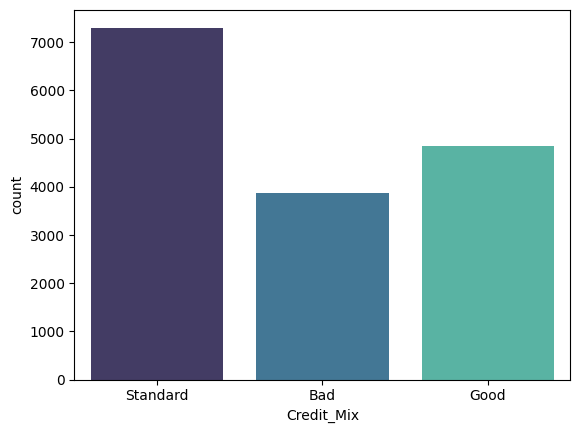

In [ ]:
sns.countplot(x='Credit_Mix', data=test, palette="mako")
plt.show()

In [ ]:
# Replace missing values with "Unknown"
test['Credit_Mix'].fillna("Unknown", inplace=True)

<ipython-input-234-6ce5ddcd3b5b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Mix', data=test, palette="mako")


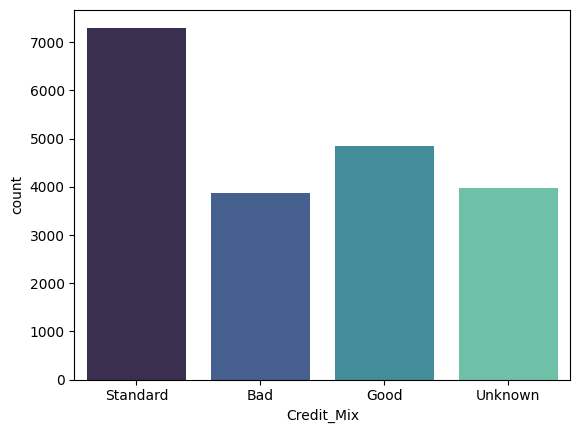

In [ ]:
sns.countplot(x='Credit_Mix', data=test, palette="mako")
plt.show()

In [ ]:
# Work on Credit_Mix Column
# Unkown --> 0 , Bad --> 1 , Standard --> 2 , Good --> 3
test['Credit_Mix']=test['Credit_Mix'].replace("Unknown",0)
test['Credit_Mix']=test['Credit_Mix'].replace("Bad",1)
test['Credit_Mix']=test['Credit_Mix'].replace("Standard",2)
test['Credit_Mix']=test['Credit_Mix'].replace("Good",3)

In [ ]:
print(test['Credit_Mix'].unique())

[2 1 3 0]


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 15664 to 43464
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               20000 non-null  object 
 1   Month                     20000 non-null  float64
 2   Age                       20000 non-null  float64
 3   Occupation                20000 non-null  object 
 4   Annual_Income             20000 non-null  float64
 5   Monthly_Inhand_Salary     20000 non-null  float64
 6   Num_Bank_Accounts         20000 non-null  float64
 7   Num_Credit_Card           20000 non-null  float64
 8   Interest_Rate             20000 non-null  float64
 9   Num_of_Loan               20000 non-null  float64
 10  Type_of_Loan              19999 non-null  object 
 11  Delay_from_due_date       20000 non-null  float64
 12  Num_of_Delayed_Payment    20000 non-null  float64
 13  Changed_Credit_Limit      20000 non-null  float64
 14  Nu

In [ ]:
# Monthly_Balance           49438 non-null  object
test.describe().T
"""
1- Num_of_Loan: Negative --> Positive
2- Num_of_Delayed_Payment : Negative --> 0
3- Changed_Credit_Limit : Negative --> Positive
"""

'\n1- Num_of_Loan: Negative --> Positive\n2- Num_of_Delayed_Payment : Negative --> 0\n3- Changed_Credit_Limit : Negative --> Positive\n'

In [ ]:
print(test['Type_of_Loan'].unique())

[nan
 'Credit-Builder Loan, Credit-Builder Loan, Auto Loan, Home Equity Loan, Auto Loan, and Mortgage Loan'
 'Debt Consolidation Loan, Home Equity Loan, Home Equity Loan, and Debt Consolidation Loan'
 ...
 'Mortgage Loan, Home Equity Loan, Credit-Builder Loan, Auto Loan, and Not Specified'
 'Personal Loan, Personal Loan, Auto Loan, Not Specified, Home Equity Loan, Not Specified, and Home Equity Loan'
 'Payday Loan, Mortgage Loan, Home Equity Loan, Payday Loan, and Home Equity Loan']


In [ ]:
test=test.drop(columns=["Type_of_Loan"],axis=1)

In [ ]:
test=test.drop(columns=["Customer_ID"],axis=1)

<ipython-input-242-b41d5ce0f2b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=test, palette="mako")


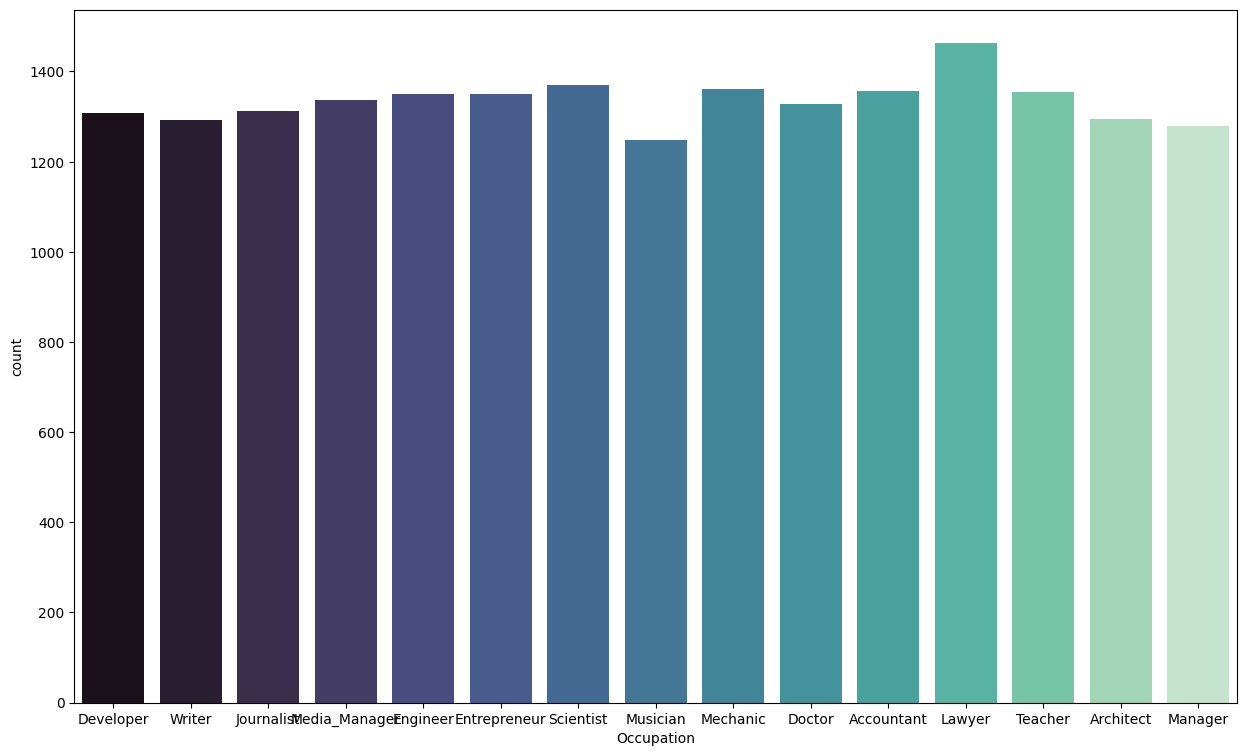

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(x='Occupation', data=test, palette="mako")
plt.show()

In [ ]:
test['Occupation']=test['Occupation'].replace("Scientist",1)
test['Occupation']=test['Occupation'].replace("Teacher",2)
test['Occupation']=test['Occupation'].replace("Engineer",3)
test['Occupation']=test['Occupation'].replace("Entrepreneur",4)
test['Occupation']=test['Occupation'].replace("Developer",5)
test['Occupation']=test['Occupation'].replace("Lawyer",6)
test['Occupation']=test['Occupation'].replace("Media_Manager",7)
test['Occupation']=test['Occupation'].replace("Doctor",8)
test['Occupation']=test['Occupation'].replace("Journalist",9)
test['Occupation']=test['Occupation'].replace("Manager",10)
test['Occupation']=test['Occupation'].replace("Accountant",11)
test['Occupation']=test['Occupation'].replace("Musician",12)
test['Occupation']=test['Occupation'].replace("Mechanic",13)
test['Occupation']=test['Occupation'].replace("Writer",14)
test['Occupation']=test['Occupation'].replace("Architect",15)

In [ ]:
print(test['Payment_of_Min_Amount'].unique())

['Yes' 'NM' 'No']


<ipython-input-245-44b92f030c07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment_of_Min_Amount', data=test, palette="mako")


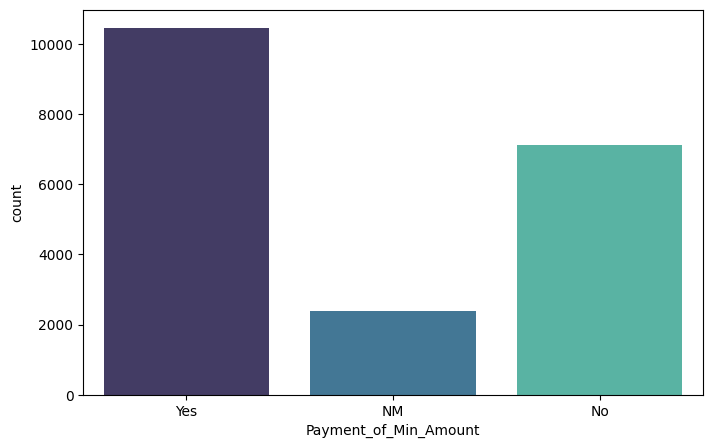

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment_of_Min_Amount', data=test, palette="mako")
plt.show()

In [ ]:
test['Payment_of_Min_Amount']=test['Payment_of_Min_Amount'].replace("No",0)
test['Payment_of_Min_Amount']=test['Payment_of_Min_Amount'].replace("NM",1)
test['Payment_of_Min_Amount']=test['Payment_of_Min_Amount'].replace("Yes",2)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 15664 to 43464
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     20000 non-null  float64
 1   Age                       20000 non-null  float64
 2   Occupation                20000 non-null  int64  
 3   Annual_Income             20000 non-null  float64
 4   Monthly_Inhand_Salary     20000 non-null  float64
 5   Num_Bank_Accounts         20000 non-null  float64
 6   Num_Credit_Card           20000 non-null  float64
 7   Interest_Rate             20000 non-null  float64
 8   Num_of_Loan               20000 non-null  float64
 9   Delay_from_due_date       20000 non-null  float64
 10  Num_of_Delayed_Payment    20000 non-null  float64
 11  Changed_Credit_Limit      20000 non-null  float64
 12  Num_Credit_Inquiries      20000 non-null  float64
 13  Credit_Mix                20000 non-null  int64  
 14  Ou

In [ ]:
test['Num_of_Loan'] = test['Num_of_Loan'].abs()

In [ ]:
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].abs()

In [ ]:
mask = (test["Num_of_Delayed_Payment"] <0)
test.loc[mask, "Num_of_Delayed_Payment"] = 0

In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,20000.0,4.488550,2.291840e+00,1.000,2.000000,4.0000,6.00000,8.000000e+00
Age,20000.0,33.263850,1.069706e+01,14.000,24.000000,33.0000,41.00000,5.600000e+01
Occupation,20000.0,7.923600,4.316584e+00,1.000,4.000000,8.0000,12.00000,1.500000e+01
Annual_Income,20000.0,174009.963218,1.398481e+06,7005.930,19461.230000,37974.4200,73420.92000,2.410537e+07
Monthly_Inhand_Salary,20000.0,4214.798035,3.180972e+03,303.645,1625.509000,3135.9325,6020.49000,1.520463e+04
Num_Bank_Accounts,20000.0,5.667170,7.401490e+00,0.000,3.750000,6.0000,7.00000,2.920000e+02
Num_Credit_Card,20000.0,21.972800,1.268977e+02,0.000,4.000000,6.0000,7.00000,1.498000e+03
Interest_Rate,20000.0,76.523000,4.848953e+02,1.000,8.000000,13.0000,20.00000,5.797000e+03
Num_of_Loan,20000.0,7.194070,1.852788e+01,0.000,2.000000,3.0000,6.00000,1.000000e+02
Delay_from_due_date,20000.0,21.200500,1.487951e+01,0.000,10.000000,18.0000,28.00000,6.700000e+01


In [ ]:
test['Monthly_Balance'].value_counts()

360.54481550954176    1
271.0467514329584     1
513.3624236199661     1
245.0346693606783     1
295.52846423251464    1
                     ..
289.59114692822993    1
337.1369371879076     1
549.8364258685284     1
249.3984887691853     1
277.3831113201244     1
Name: Monthly_Balance, Length: 19750, dtype: int64

In [ ]:
test['Monthly_Balance']=test['Monthly_Balance'].str.strip().replace('__-333333333333333333333333333__',np.nan)
test['Monthly_Balance']=test['Monthly_Balance'].astype("float")
test['Monthly_Balance']=test['Monthly_Balance'].fillna(test['Monthly_Balance'].median())
test['Monthly_Balance']=test['Monthly_Balance'].round(3)

In [ ]:
test['Monthly_Balance'].value_counts()

335.265    610
249.212      3
364.508      3
347.348      3
324.799      3
          ... 
590.902      1
124.812      1
712.014      1
370.529      1
277.383      1
Name: Monthly_Balance, Length: 18994, dtype: int64

In [ ]:
# Actual Output for test
y_test=y_test.replace("Poor",1)
y_test=y_test.replace("Standard",2)
y_test=y_test.replace("Good",3)

In [ ]:
y_test.unique()

array([2, 1, 3])

## Save the Dataset

In [ ]:
X_train.to_csv('/content/drive/MyDrive/data/X_train.csv', index=False)

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/data/X_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_train.to_csv('/content/drive/MyDrive/data/y_train.csv', index=False)

In [ ]:
files.download('/content/drive/MyDrive/data/y_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test.to_csv('/content/drive/MyDrive/data/X_test.csv', index=False)
files.download('/content/drive/MyDrive/data/X_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_test.to_csv('/content/drive/MyDrive/data/y_test.csv', index=False)
files.download('/content/drive/MyDrive/data/y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

In [ ]:
# For imbalanced data in target
from sklearn.datasets import make_classification
# X, y = make_classification( n_classes=3,
#                            weights=[0.01, 0.05, 0.94],
#                            random_state=0)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1234)
X_train, y_train = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_train).items()))

[(1, 42516), (2, 42516), (3, 42516)]


## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [ ]:
baseline_model = LogisticRegression(penalty='none', random_state=1234, max_iter = 100)#,  class_weight='balanced') # Non regularized model so the penalty is none
baseline_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=1234)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [ ]:
y_pred = baseline_model.predict(test)

In [ ]:
y_pred

array([1, 1, 3, ..., 1, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 38.88%


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

[link text](https://)## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

Which of the two regularizations performs better?

In [ ]:
# Regularization Mode: On
model_with_l2_regularization = LogisticRegression(penalty='l2', random_state=1234)
model_with_l2_regularization.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1234)

In [ ]:
y_pred_with_l2_regularization = model_with_l2_regularization.predict(test)

In [ ]:
accuracy_with_l2_regularization = accuracy_score(y_test, y_pred_with_l2_regularization)
print("Accuracy: {:.2f}%".format(accuracy_with_l2_regularization * 100))

Accuracy: 38.88%


In [ ]:
# I got the same accuracy in both but I think without Regularization is better

## `iii` Tuning Hyperparameters

Try different `C` values and evaluate. What is the panalty value?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Try different values of C (regularization strength)
    'penalty': ['l1', 'l2'],     # To Try both L1 and L2 regularization
}

In [ ]:
# Create RandomizedSearchCV object
log_reg = LogisticRegression(random_state=1234)
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=10, cv=5, random_state=1234)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=1234),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2']},
                   random_state=1234)

In [ ]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'penalty': 'l2', 'C': 100.0}


In [ ]:
# Get the best model
best_model = random_search.best_estimator_

In [ ]:
y_pred_best = best_model.predict(test)

In [ ]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_mat_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

In [ ]:
print("Best Model Performance:")
print(f"Accuracy: {accuracy_best*100}%")
print(f"Confusion Matrix:\n{confusion_mat_best}")
print(f"Classification Report:\n{classification_rep_best}")

Best Model Performance:
Accuracy: 38.879999999999995%
Confusion Matrix:
[[4471  401  925]
 [4716 1013 4929]
 [ 892  361 2292]]
Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.77      0.56      5797
           2       0.57      0.10      0.16     10658
           3       0.28      0.65      0.39      3545

    accuracy                           0.39     20000
   macro avg       0.43      0.50      0.37     20000
weighted avg       0.48      0.39      0.32     20000



------------------

# `06` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
# Make predictions on the test set
y_pred_test = best_model.predict(test)

In [ ]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_mat_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

In [ ]:
print("Final Model Performance on Test Set:")
print(f"Accuracy: {accuracy_test*100}%")
print(f"Confusion Matrix:\n{confusion_mat_test}")
print(f"Classification Report:\n{classification_rep_test}")

Final Model Performance on Test Set:
Accuracy: 38.879999999999995%
Confusion Matrix:
[[4471  401  925]
 [4716 1013 4929]
 [ 892  361 2292]]
Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.77      0.56      5797
           2       0.57      0.10      0.16     10658
           3       0.28      0.65      0.39      3545

    accuracy                           0.39     20000
   macro avg       0.43      0.50      0.37     20000
weighted avg       0.48      0.39      0.32     20000



-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$